**REQUIREMENTS**


*   Consider the monthly sales experience of each store by looking at:
1. total sales revenue
2. total number of customers
3. average number of transactions per customer
   
* Create a measure to compare different control stores to each of the trial stores.Consider using Pearson correlations or a metric such as a magnitude distance e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance) as a measure.

* Once you have selected your control stores, compare each trial and control pair during the trial period.
* Test if total sales are significantly different in the trial period and if so, check if the driver of change is more purchasing customers or more purchases per customers etc.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/QVI_data.csv')
dataset.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


# **SELECTING CONTROL STORES**

In [ ]:
#Creating a feature to group data in months
dataset['MONTHLY']=[''.join(x.split('-')[0:2]) for x in dataset.DATE]
dataset.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTHLY
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
 12  MONTHLY           264834 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 26.3+ MB


In [ ]:
#Converting monthly feature to an 'int' type
dataset['MONTHLY']=pd.to_numeric(dataset['MONTHLY'])
dataset['MONTHLY'].dtypes

dtype('int64')

# ***METRICS***

In [ ]:
#Total monthly sales in each store
tot_mnthly_sales=dataset.groupby(['STORE_NBR','MONTHLY']).TOT_SALES.sum()
tot_mnthly_sales

STORE_NBR  MONTHLY
1          201807     206.9
           201808     176.1
           201809     278.8
           201810     188.1
           201811     192.6
                      ...  
272        201902     395.5
           201903     442.3
           201904     445.1
           201905     314.6
           201906     312.1
Name: TOT_SALES, Length: 3169, dtype: float64

In [ ]:
#Unique number of monthly customers per store
nbr_customers=dataset.groupby(['STORE_NBR','MONTHLY']).LYLTY_CARD_NBR.nunique()
nbr_customers

STORE_NBR  MONTHLY
1          201807     49
           201808     42
           201809     59
           201810     44
           201811     46
                      ..
272        201902     45
           201903     50
           201904     54
           201905     34
           201906     34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [ ]:
#Average monthly transaction per customer in each store
transaction_per_cst=dataset.groupby(['STORE_NBR','MONTHLY']).TXN_ID.nunique()/dataset.groupby(['STORE_NBR','MONTHLY']).LYLTY_CARD_NBR.nunique()
transaction_per_cst


STORE_NBR  MONTHLY
1          201807     1.061224
           201808     1.023810
           201809     1.050847
           201810     1.022727
           201811     1.021739
                        ...   
272        201902     1.066667
           201903     1.060000
           201904     1.018519
           201905     1.176471
           201906     1.088235
Length: 3169, dtype: float64

In [ ]:
#Average monthly Price per chip for each store
avg_mnthly_price=dataset.groupby(['STORE_NBR','MONTHLY']).TOT_SALES.sum()/dataset.groupby(['STORE_NBR','MONTHLY']).PROD_QTY.sum()
avg_mnthly_price

STORE_NBR  MONTHLY
1          201807     3.337097
           201808     3.261111
           201809     3.717333
           201810     3.243103
           201811     3.378947
                        ...   
272        201902     4.346154
           201903     4.379208
           201904     4.239048
           201905     4.430986
           201906     4.458571
Length: 3169, dtype: float64

In [ ]:
#monthly Chips per transaction each store
chips_per_transaction=dataset.groupby(['STORE_NBR','MONTHLY']).PROD_QTY.sum()/dataset.groupby(['STORE_NBR','MONTHLY']).TXN_ID.nunique()
chips_per_transaction

STORE_NBR  MONTHLY
1          201807     1.192308
           201808     1.255814
           201809     1.209677
           201810     1.288889
           201811     1.212766
                        ...   
272        201902     1.895833
           201903     1.905660
           201904     1.909091
           201905     1.775000
           201906     1.891892
Length: 3169, dtype: float64

In [ ]:
#Merging to metrics to a dataframe
monthly_store_metrics=[tot_mnthly_sales,nbr_customers,transaction_per_cst,avg_mnthly_price,chips_per_transaction]
monthly_store_metrics=pd.concat(monthly_store_metrics,join='outer',axis=1)
monthly_store_metrics


TOT_SALES  LYLTY_CARD_NBR         0         1         2
STORE_NBR MONTHLY                                                         
1         201807       206.9              49  1.061224  3.337097  1.192308
          201808       176.1              42  1.023810  3.261111  1.255814
          201809       278.8              59  1.050847  3.717333  1.209677
          201810       188.1              44  1.022727  3.243103  1.288889
          201811       192.6              46  1.021739  3.378947  1.212766
...                      ...             ...       ...       ...       ...
272       201902       395.5              45  1.066667  4.346154  1.895833
          201903       442.3              50  1.060000  4.379208  1.905660
          201904       445.1              54  1.018519  4.239048  1.909091
          201905       314.6              34  1.176471  4.430986  1.775000
          201906       312.1              34  1.088235  4.458571  1.891892

[3169 rows x 5 columns]

In [ ]:
#Renaming the columns in dataframe
monthly_store_metrics.rename(columns={'TOT_SALES':'tot_mnthly_sales','LYLTY_CARD_NBR':'mnthly_nbr_of_customers',0:'mnthly_transaction_pr_cstmr',1:'avg_mnthly_price',2:'chips_per_transaction'},inplace=True)
monthly_store_metrics.head()

tot_mnthly_sales  ...  chips_per_transaction
STORE_NBR MONTHLY                    ...                       
1         201807              206.9  ...               1.192308
          201808              176.1  ...               1.255814
          201809              278.8  ...               1.209677
          201810              188.1  ...               1.288889
          201811              192.6  ...               1.212766

[5 rows x 5 columns]

In [ ]:
#Creating a pivot table for monthly transaction entries of stores
non=pd.pivot_table(dataset,index='STORE_NBR',columns='MONTHLY',values='TXN_ID',aggfunc='count')
non

MONTHLY,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,52.0,54.0,34.0,48.0,51.0,43.0,38.0,37.0,47.0,50.0,52.0,40.0
269,139.0,132.0,124.0,148.0,136.0,133.0,144.0,133.0,122.0,139.0,130.0,127.0
270,139.0,154.0,126.0,119.0,133.0,149.0,155.0,125.0,143.0,132.0,128.0,127.0


In [ ]:
#Identifying missing sequential monthly entries for each store
non.isnull().sum()

MONTHLY
201807    6
201808    9
201809    8
201810    7
201811    8
201812    9
201901    9
201902    8
201903    7
201904    7
201905    9
201906    8
dtype: int64

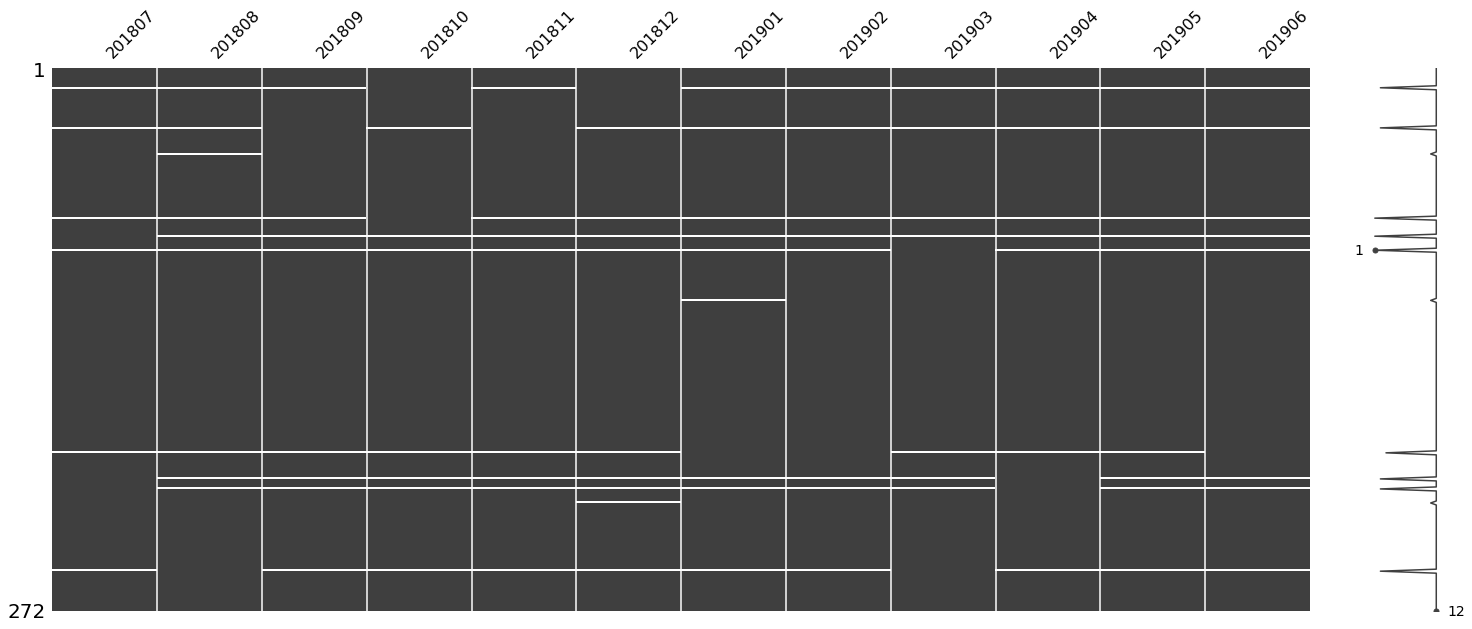

In [ ]:
#Visualising the missing data entries for each month
import missingno
missingno.matrix(non)

In [ ]:
#Identifying the names of the stores with missing monthly entries
non_stores=non[non.isnull().any(axis=1)].index.tolist()
non_stores

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [ ]:
#Setting the dataframe to same level of indexing
monthly_store_metrics.reset_index(inplace=True)
monthly_store_metrics

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction
0,1,201807,206.9,49,1.061224,3.337097,1.192308
1,1,201808,176.1,42,1.023810,3.261111,1.255814
2,1,201809,278.8,59,1.050847,3.717333,1.209677
3,1,201810,188.1,44,1.022727,3.243103,1.288889
4,1,201811,192.6,46,1.021739,3.378947,1.212766
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,4.346154,1.895833
3165,272,201903,442.3,50,1.060000,4.379208,1.905660
3166,272,201904,445.1,54,1.018519,4.239048,1.909091
3167,272,201905,314.6,34,1.176471,4.430986,1.775000


In [ ]:
#Dropping the missing entries
monthly_store_metrics=monthly_store_metrics[~monthly_store_metrics['STORE_NBR'].isin(non_stores)]

In [ ]:
monthly_store_metrics.isnull().sum()

STORE_NBR                      0
MONTHLY                        0
tot_mnthly_sales               0
mnthly_nbr_of_customers        0
mnthly_transaction_pr_cstmr    0
avg_mnthly_price               0
chips_per_transaction          0
dtype: int64

In [ ]:
#Filtering the monthly metrics to a pretrial period i.e. before 201902
pre_trial_metrics=monthly_store_metrics.loc[monthly_store_metrics['MONTHLY'] < 201902,:]
pre_trial_metrics.head()

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction
0,1,201807,206.9,49,1.061224,3.337097,1.192308
1,1,201808,176.1,42,1.023810,3.261111,1.255814
2,1,201809,278.8,59,1.050847,3.717333,1.209677
3,1,201810,188.1,44,1.022727,3.243103,1.288889
4,1,201811,192.6,46,1.021739,3.378947,1.212766


# **Creating a measure to compare different control stores to each of the trial stores**

In [ ]:
#Creating a function that evaluates correlation between trial stores and other stores
def calculateCorrelation(inputTable, metric, trial_store):
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Correlation': []})
    a = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        b = inputTable.loc[inputTable['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        output = output.append({'Store1': trial_store, 'Store2': i, 'Correlation': b.corr(a)}, ignore_index = True)
    return output


In [ ]:
# Create another function which calculates a standardised magnitude difference 

def calculateMagnitudeDistance(inputTable, metric, trial_store):
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Magnitude' : []})
    a = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        b = inputTable.loc[inputTable['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        c = abs(a-b)
        d = np.mean(1-(c-min(c))/(max(c)-min(c)))
        output = output.append({'Store1': trial_store, 'Store2': i, 'Magnitude': d}, ignore_index = True)
    return output


# **Selecting control store for trial store 77**

In [ ]:
trial_store=77
#Calculating correlation
corr_nbr_sales=calculateCorrelation(pre_trial_metrics,'tot_mnthly_sales',trial_store)
corr_nbr_customers=calculateCorrelation(pre_trial_metrics,'mnthly_nbr_of_customers',trial_store)
#Calculating magnitude distance
magnitude_nbr_sales=calculateMagnitudeDistance(pre_trial_metrics,'tot_mnthly_sales',trial_store)
magnitude_nbr_customers=calculateMagnitudeDistance(pre_trial_metrics,'mnthly_nbr_of_customers',trial_store)

In [ ]:
corr_nbr_sales

,Store1,Store2,Correlation
0,77.0,1.0,0.075218
1,77.0,2.0,-0.263079
2,77.0,3.0,0.806644
3,77.0,4.0,-0.263300
4,77.0,5.0,-0.110652
...,...,...,...
255,77.0,268.0,0.344757
256,77.0,269.0,-0.315730
257,77.0,270.0,0.315430
258,77.0,271.0,0.355487


In [ ]:
corr_nbr_customers

,Store1,Store2,Correlation
0,77.0,1.0,0.322168
1,77.0,2.0,-0.572051
2,77.0,3.0,0.834207
3,77.0,4.0,-0.295639
4,77.0,5.0,0.370659
...,...,...,...
255,77.0,268.0,0.369517
256,77.0,269.0,-0.474293
257,77.0,270.0,-0.131259
258,77.0,271.0,0.019629


In [ ]:
magnitude_nbr_sales


,Store1,Store2,Magnitude
0,77.0,1.0,0.408163
1,77.0,2.0,0.590119
2,77.0,3.0,0.522914
3,77.0,4.0,0.644934
4,77.0,5.0,0.516320
...,...,...,...
255,77.0,268.0,0.429787
256,77.0,269.0,0.559099
257,77.0,270.0,0.591547
258,77.0,271.0,0.341091


In [ ]:
magnitude_nbr_customers

,Store1,Store2,Magnitude
0,77.0,1.0,0.663866
1,77.0,2.0,0.471429
2,77.0,3.0,0.489796
3,77.0,4.0,0.498258
4,77.0,5.0,0.512605
...,...,...,...
255,77.0,268.0,0.571429
256,77.0,269.0,0.484472
257,77.0,270.0,0.536680
258,77.0,271.0,0.328571


In [ ]:
#Concatenate sales magnitude and corrrelation
corr_magn_sales=pd.concat([corr_nbr_sales,magnitude_nbr_sales['Magnitude']],axis=1)
corr_magn_sales

,Store1,Store2,Correlation,Magnitude
0,77.0,1.0,0.075218,0.408163
1,77.0,2.0,-0.263079,0.590119
2,77.0,3.0,0.806644,0.522914
3,77.0,4.0,-0.263300,0.644934
4,77.0,5.0,-0.110652,0.516320
...,...,...,...,...
255,77.0,268.0,0.344757,0.429787
256,77.0,269.0,-0.315730,0.559099
257,77.0,270.0,0.315430,0.591547
258,77.0,271.0,0.355487,0.341091


In [ ]:

#Concatenate customers magnitude and corrrelation
corr_magn_customers=pd.concat([corr_nbr_customers,magnitude_nbr_customers['Magnitude']],axis=1)
corr_magn_customers

,Store1,Store2,Correlation,Magnitude
0,77.0,1.0,0.322168,0.663866
1,77.0,2.0,-0.572051,0.471429
2,77.0,3.0,0.834207,0.489796
3,77.0,4.0,-0.295639,0.498258
4,77.0,5.0,0.370659,0.512605
...,...,...,...,...
255,77.0,268.0,0.369517,0.571429
256,77.0,269.0,-0.474293,0.484472
257,77.0,270.0,-0.131259,0.536680
258,77.0,271.0,0.019629,0.328571


In [ ]:
# Add an additional column which calculates the weighted average of correlation and magnitude for sales

corr_weight = 0.5
corr_magn_sales['corr_magn_sales_wavg'] = corr_weight * corr_magn_sales['Correlation'] + (1 - corr_weight) * corr_magn_sales['Magnitude']
corr_magn_sales.head()

,Store1,Store2,Correlation,Magnitude,corr_magn_sales_wavg
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


In [ ]:
# Add an additional column which calculates the weighted average of correlation and magnitude for customers
corr_weight = 0.5
corr_magn_customers['corr_magn_customers_wavg'] = corr_weight * corr_magn_customers['Correlation'] + (1 - corr_weight) * corr_magn_customers['Magnitude']
corr_magn_customers.head()

,Store1,Store2,Correlation,Magnitude,corr_magn_customers_wavg
0,77.0,1.0,0.322168,0.663866,0.493017
1,77.0,2.0,-0.572051,0.471429,-0.050311
2,77.0,3.0,0.834207,0.489796,0.662002
3,77.0,4.0,-0.295639,0.498258,0.101310
4,77.0,5.0,0.370659,0.512605,0.441632


In [ ]:
corr_magn_sales.set_index(['Store1', 'Store2'], inplace = True)
corr_magn_customers.set_index(['Store1', 'Store2'], inplace = True)

In [ ]:
# Create a new dataframe 'score_Control' which takes the average of 'scoreNSales' and 'scoreNCust'

score_Control = pd.concat([corr_magn_sales['corr_magn_sales_wavg'], corr_magn_customers['corr_magn_customers_wavg']] ,axis = 1)
score_Control

corr_magn_sales_wavg  corr_magn_customers_wavg
Store1 Store2                                                
77.0   1.0                 0.241691                  0.493017
       2.0                 0.163520                 -0.050311
       3.0                 0.664779                  0.662002
       4.0                 0.190817                  0.101310
       5.0                 0.202834                  0.441632
...                             ...                       ...
       268.0               0.387272                  0.470473
       269.0               0.121684                  0.005090
       270.0               0.453489                  0.202710
       271.0               0.348289                  0.174100
       272.0               0.320626                  0.384336

[260 rows x 2 columns]

In [ ]:
# Add a new column to 'score_Control' which computes the average of 'corr_magn_sales_wavg' and 'corr_magn_customers_wavg'

score_Control['finalControlScore'] = 0.5 * (score_Control['corr_magn_sales_wavg'] + score_Control['corr_magn_customers_wavg'])
score_Control.head()

corr_magn_sales_wavg  ...  finalControlScore
Store1 Store2                        ...                   
77.0   1.0                 0.241691  ...           0.367354
       2.0                 0.163520  ...           0.056604
       3.0                 0.664779  ...           0.663390
       4.0                 0.190817  ...           0.146064
       5.0                 0.202834  ...           0.322233

[5 rows x 3 columns]

In [ ]:
#Sorting the stores by highest final control score
score_Control.sort_values(by = 'finalControlScore', ascending = False).head()


corr_magn_sales_wavg  ...  finalControlScore
Store1 Store2                        ...                   
77.0   233.0               0.697290  ...           0.756949
       71.0                0.789497  ...           0.726310
       84.0                0.656972  ...           0.685986
       119.0               0.636046  ...           0.682887
       115.0               0.708347  ...           0.676751

[5 rows x 3 columns]

In [ ]:
#Examining the  metrics similarity of store 233 and store 77 prior to the trial period
#Setting control store as 233
control_store=233

past_sales = pre_trial_metrics

# Create a new column within 'past_sales' which categorises store type
store_type = []

for i in past_sales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

past_sales['store_type'] = store_type
past_sales.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,store_type
0,1,201807,206.9,49,1.061224,3.337097,1.192308,Other Stores
1,1,201808,176.1,42,1.023810,3.261111,1.255814,Other Stores
2,1,201809,278.8,59,1.050847,3.717333,1.209677,Other Stores
3,1,201810,188.1,44,1.022727,3.243103,1.288889,Other Stores
4,1,201811,192.6,46,1.021739,3.378947,1.212766,Other Stores


In [ ]:
past_sales['store_type'].unique()

array(['Other Stores', 'Trial Store', 'Control Store'], dtype=object)

In [ ]:
past_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   STORE_NBR                    1820 non-null   int64  
 1   MONTHLY                      1820 non-null   int64  
 2   tot_mnthly_sales             1820 non-null   float64
 3   mnthly_nbr_of_customers      1820 non-null   int64  
 4   mnthly_transaction_pr_cstmr  1820 non-null   float64
 5   avg_mnthly_price             1820 non-null   float64
 6   chips_per_transaction        1820 non-null   float64
 7   store_type                   1820 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 128.0+ KB


In [ ]:
#Changing format of monthly column from 'int64' to 'datetime object'

past_sales['Transaction_Month'] = pd.to_datetime(past_sales['MONTHLY'].astype(str), format = '%Y%m')
past_sales.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,store_type,Transaction_Month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,Other Stores,2018-11-01


In [ ]:
past_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   STORE_NBR                    1820 non-null   int64         
 1   MONTHLY                      1820 non-null   int64         
 2   tot_mnthly_sales             1820 non-null   float64       
 3   mnthly_nbr_of_customers      1820 non-null   int64         
 4   mnthly_transaction_pr_cstmr  1820 non-null   float64       
 5   avg_mnthly_price             1820 non-null   float64       
 6   chips_per_transaction        1820 non-null   float64       
 7   store_type                   1820 non-null   object        
 8   Transaction_Month            1820 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 142.2+ KB


# **Visualisation for *Control Store,Trial Store & Other Stores* using Tot_Sales**

In [ ]:
#Create dataframes
#Control Store
control_store_sales = past_sales.loc[past_sales['store_type'] == 'Control Store', ['Transaction_Month', 'tot_mnthly_sales']]
control_store_sales.set_index('Transaction_Month', inplace = True)
control_store_sales.rename(columns = {'tot_mnthly_sales ': 'Control_Store_Sales'}, inplace = True)

#Trial Store
trial_store_sales = past_sales.loc[past_sales['store_type'] == 'Trial Store', ['Transaction_Month', 'tot_mnthly_sales']]
trial_store_sales.set_index('Transaction_Month', inplace = True)
trial_store_sales.rename(columns = {'tot_mnthly_sales ': 'Trial_Store_Sales'}, inplace = True)

#Other Stores
other_store_sales = past_sales.loc[past_sales['store_type'] == 'Other Stores', ['Transaction_Month', 'tot_mnthly_sales']]
other_store_sales = pd.DataFrame(other_store_sales.groupby('Transaction_Month').tot_mnthly_sales.mean())
other_store_sales.rename(columns = {'tot_mnthly_sales ': 'Other_Stores_Sales'}, inplace = True)



In [ ]:
#Combining the dataframes
combined_stores_sales=pd.concat([control_store_sales,trial_store_sales,other_store_sales],axis=1)
combined_stores_sales

,tot_mnthly_sales,tot_mnthly_sales,tot_mnthly_sales
Transaction_Month,,,
2018-07-01,290.7,296.8,638.004651
2018-08-01,285.9,255.5,610.223450
2018-09-01,228.6,225.2,620.198450
2018-10-01,185.7,204.5,635.314729
2018-11-01,211.6,245.3,618.864341
2018-12-01,279.8,267.3,648.453876
2019-01-01,177.5,204.4,628.684496


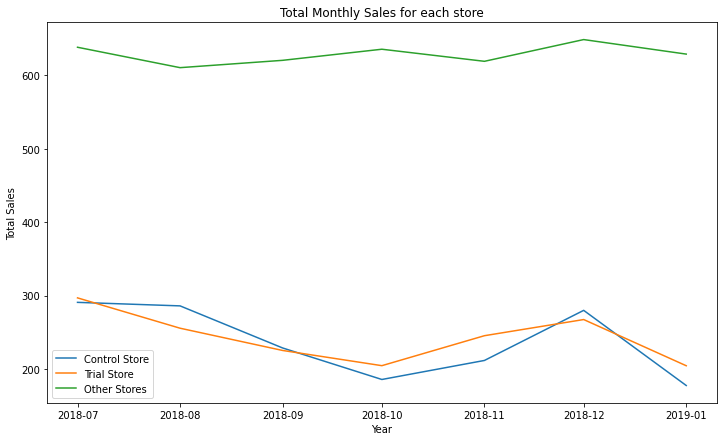

In [ ]:
#Plotting combined monthly sales for each store
plt.figure(figsize=(12,7))
plt.plot(combined_stores_sales)
plt.title('Total Monthly Sales for each store')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(['Control Store','Trial Store','Other Stores'])

# **Visualisation for *Control Store,Trial Store & Other Stores* using mnthly_nbr_of_customers**

In [ ]:
#Create dataframes
#Control Store
control_store_customers = past_sales.loc[past_sales['store_type'] == 'Control Store', ['Transaction_Month', 'mnthly_nbr_of_customers']]
control_store_customers.set_index('Transaction_Month', inplace = True)
control_store_customers.rename(columns = {'mnthly_nbr_of_customers ': 'Control_Store_Customers'}, inplace = True)

#Trial Store
trial_store_customers = past_sales.loc[past_sales['store_type'] == 'Trial Store', ['Transaction_Month', 'mnthly_nbr_of_customers']]
trial_store_customers.set_index('Transaction_Month', inplace = True)
trial_store_customers.rename(columns = {'mnthly_nbr_of_customers ': 'Trial_Store_Customers'}, inplace = True)

#Other Stores
other_store_customers = past_sales.loc[past_sales['store_type'] == 'Other Stores', ['Transaction_Month', 'mnthly_nbr_of_customers']]
other_store_customers = pd.DataFrame(other_store_customers.groupby('Transaction_Month').mnthly_nbr_of_customers.mean())
other_store_customers.rename(columns = {'mnthly_nbr_of_customers': 'Other_Stores_Customers'}, inplace = True)



In [ ]:
#Combining the dataframes
combined_stores_customers=pd.concat([control_store_customers,trial_store_customers,other_store_customers],axis=1)
combined_stores_customers

,mnthly_nbr_of_customers,mnthly_nbr_of_customers,Other_Stores_Customers
Transaction_Month,,,
2018-07-01,51,51,72.333333
2018-08-01,48,47,72.120155
2018-09-01,42,42,70.131783
2018-10-01,35,37,71.608527
2018-11-01,40,41,70.534884
2018-12-01,47,46,73.515504
2019-01-01,35,35,71.240310


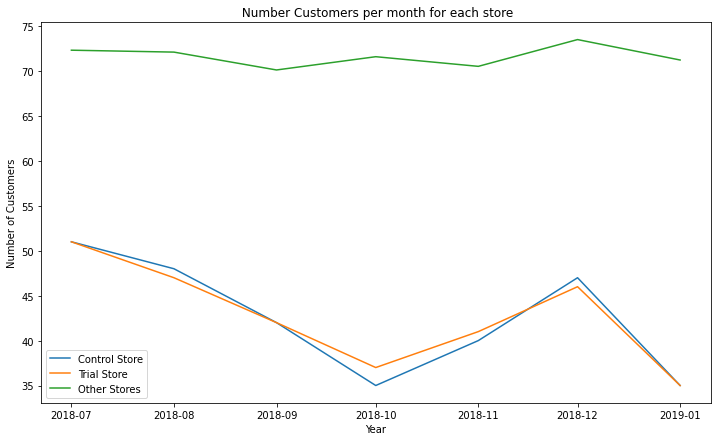

In [ ]:
#Plotting combined number of customers for each store
plt.figure(figsize=(12,7))
plt.plot(combined_stores_customers)
plt.title(' Number Customers per month for each store')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.legend(['Control Store','Trial Store','Other Stores'])

# **Pre-trial assessment for store 77**
The trial period goes from the start of February 2019 to end of April 2019. We now want to see if there has been an uplift in overall chip sales.

# **By Sales:**

In [ ]:
#Scale pre-trial control sales to match pre-trial trial store sales
#We compute this by dividing sum of 'tot_mnthly_sales' for trial store by sum of 'tot_mnthly_sales' for control store
tot_trial_sales = pre_trial_metrics.loc[pre_trial_metrics['store_type'] == 'Trial Store' , 'tot_mnthly_sales'].sum()
tot_control_sales = pre_trial_metrics.loc[pre_trial_metrics['store_type'] == 'Control Store', 'tot_mnthly_sales'].sum()
Scaling_Factor_Sales =tot_trial_sales / tot_control_sales
Scaling_Factor_Sales 



1.023617303289553

In [ ]:
monthly_store_metrics.head()

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction
0,1,201807,206.9,49,1.061224,3.337097,1.192308
1,1,201808,176.1,42,1.023810,3.261111,1.255814
2,1,201809,278.8,59,1.050847,3.717333,1.209677
3,1,201810,188.1,44,1.022727,3.243103,1.288889
4,1,201811,192.6,46,1.021739,3.378947,1.212766


In [ ]:
Scaled_control_sales = monthly_store_metrics
Scaled_control_sales.head()

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction
0,1,201807,206.9,49,1.061224,3.337097,1.192308
1,1,201808,176.1,42,1.023810,3.261111,1.255814
2,1,201809,278.8,59,1.050847,3.717333,1.209677
3,1,201810,188.1,44,1.022727,3.243103,1.288889
4,1,201811,192.6,46,1.021739,3.378947,1.212766


In [ ]:
Scaled_control_sales=Scaled_control_sales.loc[Scaled_control_sales['STORE_NBR'] == 233]
Scaled_control_sales

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction
2699,233,201807,290.7,51,1.058824,3.303409,1.629630
2700,233,201808,285.9,48,1.041667,3.573750,1.600000
2701,233,201809,228.6,42,1.071429,3.265714,1.555556
2702,233,201810,185.7,35,1.028571,3.316071,1.555556
2703,233,201811,211.6,40,1.025000,3.412903,1.512195
2704,233,201812,279.8,47,1.063830,3.730667,1.500000
2705,233,201901,177.5,35,1.000000,3.776596,1.342857
2706,233,201902,244.0,45,1.044444,3.485714,1.489362
2707,233,201903,199.1,40,1.025000,3.374576,1.439024
2708,233,201904,158.6,30,1.066667,3.447826,1.437500


In [ ]:
# Create a column which applies 'Scaling_Factor_Sales' to 'tot_mnthly_sales' column
Scaled_control_sales['Control_Sales']=Scaled_control_sales['tot_mnthly_sales']* Scaling_Factor_Sales
Scaled_control_sales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,Control_Sales
2699,233,201807,290.7,51,1.058824,3.303409,1.629630,297.565550
2700,233,201808,285.9,48,1.041667,3.573750,1.600000,292.652187
2701,233,201809,228.6,42,1.071429,3.265714,1.555556,233.998916
2702,233,201810,185.7,35,1.028571,3.316071,1.555556,190.085733
2703,233,201811,211.6,40,1.025000,3.412903,1.512195,216.597421
2704,233,201812,279.8,47,1.063830,3.730667,1.500000,286.408121
2705,233,201901,177.5,35,1.000000,3.776596,1.342857,181.692071
2706,233,201902,244.0,45,1.044444,3.485714,1.489362,249.762622
2707,233,201903,199.1,40,1.025000,3.374576,1.439024,203.802205
2708,233,201904,158.6,30,1.066667,3.447826,1.437500,162.345704


In [ ]:
# Create 'percentage_diff' dataframe
percentage_diff = Scaled_control_sales[['MONTHLY', 'Control_Sales']]
percentage_diff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'tot_mnthly_sales'
trial_sales = monthly_store_metrics.loc[monthly_store_metrics['STORE_NBR'] == trial_store, 'tot_mnthly_sales']
trial_sales.reset_index(drop = True, inplace = True)
percentage_diff = pd.concat([percentage_diff, trial_sales], axis = 1)
percentage_diff.rename(columns = {'tot_mnthly_sales': 'trial_sales'}, inplace = True)

percentage_diff

,MONTHLY,Control_Sales,trial_sales
0,201807,297.565550,296.8
1,201808,292.652187,255.5
2,201809,233.998916,225.2
3,201810,190.085733,204.5
4,201811,216.597421,245.3
5,201812,286.408121,267.3
6,201901,181.692071,204.4
7,201902,249.762622,235.0
8,201903,203.802205,278.5
9,201904,162.345704,263.5


In [ ]:
# Calculate percentage difference and put it in a new column

percentage_diff['percentage_diff'] = abs(percentage_diff.Control_Sales - percentage_diff.trial_sales) / percentage_diff.Control_Sales
percentage_diff

,MONTHLY,Control_Sales,trial_sales,percentage_diff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516
5,201812,286.408121,267.3,0.066716
6,201901,181.692071,204.4,0.124980
7,201902,249.762622,235.0,0.059107
8,201903,203.802205,278.5,0.366521
9,201904,162.345704,263.5,0.623080


In [ ]:
#Null hypothesis:trial period== pre_trial period
#SD on %diff in pre trial period
from statistics import stdev
std_dev=stdev(percentage_diff.loc[percentage_diff['MONTHLY'] < 201902,'percentage_diff'])
std_dev

0.049940762641425544

In [ ]:
#Testing null hypothesis create a new column to compute the t-statistic
percentage_diff['t-calc']=(percentage_diff['percentage_diff'] - 0)/std_dev
percentage_diff.loc[(percentage_diff['MONTHLY'] > 201901) & (percentage_diff['MONTHLY'] < 201905) , 't-calc']

7     1.183534
8     7.339116
9    12.476373
Name: t-calc, dtype: float64

In [ ]:
#Degrees of freedom =n-1
#In our case n is the number of months for the pre-trial period which is 8
#So df=7
#Find 95% conf interval with 7 df
from scipy.stats import t 
df=7
t.isf(0.05,df)


1.8945786050613054

In [ ]:
#Add a new column to our scaled control sales for the transaction month
Scaled_control_sales['txn_month']=pd.to_datetime(Scaled_control_sales['MONTHLY'].astype(str),format='%Y%m')
Scaled_control_sales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,Control_Sales,txn_month
2699,233,201807,290.7,51,1.058824,3.303409,1.629630,297.565550,2018-07-01
2700,233,201808,285.9,48,1.041667,3.573750,1.600000,292.652187,2018-08-01
2701,233,201809,228.6,42,1.071429,3.265714,1.555556,233.998916,2018-09-01
2702,233,201810,185.7,35,1.028571,3.316071,1.555556,190.085733,2018-10-01
2703,233,201811,211.6,40,1.025000,3.412903,1.512195,216.597421,2018-11-01
2704,233,201812,279.8,47,1.063830,3.730667,1.500000,286.408121,2018-12-01
2705,233,201901,177.5,35,1.000000,3.776596,1.342857,181.692071,2019-01-01
2706,233,201902,244.0,45,1.044444,3.485714,1.489362,249.762622,2019-02-01
2707,233,201903,199.1,40,1.025000,3.374576,1.439024,203.802205,2019-03-01
2708,233,201904,158.6,30,1.066667,3.447826,1.437500,162.345704,2019-04-01


In [ ]:
control_store_sales=Scaled_control_sales.loc[:,['txn_month','Control_Sales']]
control_store_sales.set_index('txn_month',inplace=True)
control_store_sales

,Control_Sales
txn_month,
2018-07-01,297.565550
2018-08-01,292.652187
2018-09-01,233.998916
2018-10-01,190.085733
2018-11-01,216.597421
2018-12-01,286.408121
2019-01-01,181.692071
2019-02-01,249.762622
2019-03-01,203.802205


In [ ]:
monthly_store_metrics['txn_month'] = pd.to_datetime(monthly_store_metrics['MONTHLY'].astype(str), format = '%Y%m')
monthly_store_metrics.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
trial_store_sales = monthly_store_metrics.loc[monthly_store_metrics['STORE_NBR'] == trial_store, ['txn_month', 'tot_mnthly_sales']]
trial_store_sales.set_index('txn_month', inplace = True)
trial_store_sales.rename(columns = {'tot_mnthly_sales': 'Trial_Sales'}, inplace = True)
trial_store_sales

,Trial_Sales
txn_month,
2018-07-01,296.8
2018-08-01,255.5
2018-09-01,225.2
2018-10-01,204.5
2018-11-01,245.3
2018-12-01,267.3
2019-01-01,204.4
2019-02-01,235.0
2019-03-01,278.5


In [ ]:
control_store_sales['control 5% conf interval']=control_store_sales['Control_Sales']*(1-std_dev*2)
control_store_sales['control 95% conf interval']=control_store_sales['Control_Sales']*(1+std_dev*2)
control_store_sales

,Control_Sales,control 5% conf interval,control 95% conf interval
txn_month,,,
2018-07-01,297.565550,267.844249,327.286851
2018-08-01,292.652187,263.421640,321.882734
2018-09-01,233.998916,210.626747,257.371084
2018-10-01,190.085733,171.099680,209.071786
2018-11-01,216.597421,194.963341,238.231502
2018-12-01,286.408121,257.801241,315.015001
2019-01-01,181.692071,163.544390,199.839753
2019-02-01,249.762622,224.815950,274.709294
2019-03-01,203.802205,183.446130,224.158280


In [ ]:
combined_sales=pd.merge(control_store_sales,trial_store_sales,left_index=True,right_index=True)
combined_sales

,Control_Sales,control 5% conf interval,control 95% conf interval,Trial_Sales
txn_month,,,,
2018-07-01,297.565550,267.844249,327.286851,296.8
2018-08-01,292.652187,263.421640,321.882734,255.5
2018-09-01,233.998916,210.626747,257.371084,225.2
2018-10-01,190.085733,171.099680,209.071786,204.5
2018-11-01,216.597421,194.963341,238.231502,245.3
2018-12-01,286.408121,257.801241,315.015001,267.3
2019-01-01,181.692071,163.544390,199.839753,204.4
2019-02-01,249.762622,224.815950,274.709294,235.0
2019-03-01,203.802205,183.446130,224.158280,278.5


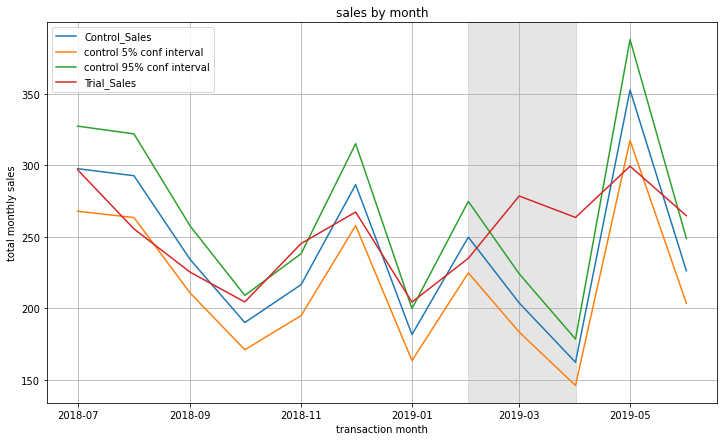

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize = (12, 7))
plt.plot(combined_sales)
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)
plt.legend(['Control_Sales',	'control 5% conf interval',	'control 95% conf interval',	'Trial_Sales'])
plt.xlabel('transaction month')
plt.ylabel('total monthly sales')
plt.title('sales by month')
plt.grid()

# **By Customers:**

In [ ]:
#Scale pre-trial control customers to match pre-trial trial store customers
#We compute this by dividing sum of 'mnthly_nbr_of_customers' for trial store by sum of 'mnthly_nbr_of_customers' for control store
tot_trial_customers = pre_trial_metrics.loc[pre_trial_metrics['store_type'] == 'Trial Store' , 'mnthly_nbr_of_customers'].sum()
tot_control_customers = pre_trial_metrics.loc[pre_trial_metrics['store_type'] == 'Control Store', 'mnthly_nbr_of_customers'].sum()
Scaling_Factor_Customers =tot_trial_customers / tot_control_customers
Scaling_Factor_Customers


1.0033557046979866

In [ ]:
Scaled_control_customers = monthly_store_metrics
Scaled_control_customers.head()

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
Scaled_control_customers=Scaled_control_customers.loc[Scaled_control_customers['STORE_NBR'] == 233]
Scaled_control_customers

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
2699,233,201807,290.7,51,1.058824,3.303409,1.629630,2018-07-01
2700,233,201808,285.9,48,1.041667,3.573750,1.600000,2018-08-01
2701,233,201809,228.6,42,1.071429,3.265714,1.555556,2018-09-01
2702,233,201810,185.7,35,1.028571,3.316071,1.555556,2018-10-01
2703,233,201811,211.6,40,1.025000,3.412903,1.512195,2018-11-01
2704,233,201812,279.8,47,1.063830,3.730667,1.500000,2018-12-01
2705,233,201901,177.5,35,1.000000,3.776596,1.342857,2019-01-01
2706,233,201902,244.0,45,1.044444,3.485714,1.489362,2019-02-01
2707,233,201903,199.1,40,1.025000,3.374576,1.439024,2019-03-01
2708,233,201904,158.6,30,1.066667,3.447826,1.437500,2019-04-01


In [ ]:
# Create a column which applies 'Scaling_Factor_Sales' to 'tot_mnthly_sales' column
Scaled_control_customers['Control_Customers']=Scaled_control_customers['mnthly_nbr_of_customers']* Scaling_Factor_Customers
Scaled_control_customers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Customers
2699,233,201807,290.7,51,1.058824,3.303409,1.629630,2018-07-01,51.171141
2700,233,201808,285.9,48,1.041667,3.573750,1.600000,2018-08-01,48.161074
2701,233,201809,228.6,42,1.071429,3.265714,1.555556,2018-09-01,42.140940
2702,233,201810,185.7,35,1.028571,3.316071,1.555556,2018-10-01,35.117450
2703,233,201811,211.6,40,1.025000,3.412903,1.512195,2018-11-01,40.134228
2704,233,201812,279.8,47,1.063830,3.730667,1.500000,2018-12-01,47.157718
2705,233,201901,177.5,35,1.000000,3.776596,1.342857,2019-01-01,35.117450
2706,233,201902,244.0,45,1.044444,3.485714,1.489362,2019-02-01,45.151007
2707,233,201903,199.1,40,1.025000,3.374576,1.439024,2019-03-01,40.134228
2708,233,201904,158.6,30,1.066667,3.447826,1.437500,2019-04-01,30.100671


In [ ]:

Scaled_control_customers['Control_Customers'] = Scaled_control_customers['mnthly_nbr_of_customers'] * Scaling_Factor_Customers
Scaled_control_customers.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Customers
2699,233,201807,290.7,51,1.058824,3.303409,1.629630,2018-07-01,51.171141
2700,233,201808,285.9,48,1.041667,3.573750,1.600000,2018-08-01,48.161074
2701,233,201809,228.6,42,1.071429,3.265714,1.555556,2018-09-01,42.140940
2702,233,201810,185.7,35,1.028571,3.316071,1.555556,2018-10-01,35.117450
2703,233,201811,211.6,40,1.025000,3.412903,1.512195,2018-11-01,40.134228


In [ ]:
# Create 'percentage_diff' dataframe
percentage_diff = Scaled_control_customers[['MONTHLY', 'Control_Customers']]
percentage_diff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'mnthly_nbr_customers'
trial_customers = monthly_store_metrics.loc[monthly_store_metrics['STORE_NBR'] == trial_store, 'mnthly_nbr_of_customers']
trial_customers.reset_index(drop = True, inplace = True)
percentage_diff = pd.concat([percentage_diff, trial_customers], axis = 1)
percentage_diff.rename(columns = {'mnthly_nbr_of_customers': 'trial_customers'}, inplace = True)

percentage_diff

,MONTHLY,Control_Customers,trial_customers
0,201807,51.171141,51
1,201808,48.161074,47
2,201809,42.140940,42
3,201810,35.117450,37
4,201811,40.134228,41
5,201812,47.157718,46
6,201901,35.117450,35
7,201902,45.151007,45
8,201903,40.134228,50
9,201904,30.100671,47


In [ ]:
# Calculate percentage difference and put it in a new column

percentage_diff['percentage_diff'] = abs(percentage_diff.Control_Customers - percentage_diff.trial_customers) / percentage_diff.Control_Customers
percentage_diff

,MONTHLY,Control_Customers,trial_customers,percentage_diff
0,201807,51.171141,51,0.003344
1,201808,48.161074,47,0.024108
2,201809,42.140940,42,0.003344
3,201810,35.117450,37,0.053607
4,201811,40.134228,41,0.021572
5,201812,47.157718,46,0.024550
6,201901,35.117450,35,0.003344
7,201902,45.151007,45,0.003344
8,201903,40.134228,50,0.245819
9,201904,30.100671,47,0.561427


In [ ]:
#Null hypothesis:trial period== pre_trial period
#SD on %diff in pre trial period
from statistics import stdev
std_dev=stdev(percentage_diff.loc[percentage_diff['MONTHLY'] < 201902,'percentage_diff'])
std_dev

0.018240748558243945

In [ ]:
#Testing null hypothesis create a new column to compute the t-statistic
percentage_diff['t-calc']=(percentage_diff['percentage_diff'] - 0)/std_dev
percentage_diff.loc[(percentage_diff['MONTHLY'] > 201901) & (percentage_diff['MONTHLY'] < 201905) , 't-calc']

7     0.183352
8    13.476388
9    30.778725
Name: t-calc, dtype: float64

In [ ]:
#Degrees of freedom =n-1
#In our case n is the number of months for the pre-trial period which is 8
#So df=7
#Find 95% conf interval with 7 df
from scipy.stats import t 
df=7
t.isf(0.05,df)


1.8945786050613054

In [ ]:
#Add a new column to our scaled control sales for the transaction month
Scaled_control_customers['txn_month']=pd.to_datetime(Scaled_control_customers['MONTHLY'].astype(str),format='%Y%m')
Scaled_control_customers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Customers
2699,233,201807,290.7,51,1.058824,3.303409,1.629630,2018-07-01,51.171141
2700,233,201808,285.9,48,1.041667,3.573750,1.600000,2018-08-01,48.161074
2701,233,201809,228.6,42,1.071429,3.265714,1.555556,2018-09-01,42.140940
2702,233,201810,185.7,35,1.028571,3.316071,1.555556,2018-10-01,35.117450
2703,233,201811,211.6,40,1.025000,3.412903,1.512195,2018-11-01,40.134228
2704,233,201812,279.8,47,1.063830,3.730667,1.500000,2018-12-01,47.157718
2705,233,201901,177.5,35,1.000000,3.776596,1.342857,2019-01-01,35.117450
2706,233,201902,244.0,45,1.044444,3.485714,1.489362,2019-02-01,45.151007
2707,233,201903,199.1,40,1.025000,3.374576,1.439024,2019-03-01,40.134228
2708,233,201904,158.6,30,1.066667,3.447826,1.437500,2019-04-01,30.100671


In [ ]:
control_store_customers=Scaled_control_customers.loc[:,['txn_month','Control_Customers']]
control_store_customers.set_index('txn_month',inplace=True)
control_store_customers

,Control_Customers
txn_month,
2018-07-01,51.171141
2018-08-01,48.161074
2018-09-01,42.140940
2018-10-01,35.117450
2018-11-01,40.134228
2018-12-01,47.157718
2019-01-01,35.117450
2019-02-01,45.151007
2019-03-01,40.134228


In [ ]:
monthly_store_metrics['txn_month'] = pd.to_datetime(monthly_store_metrics['MONTHLY'].astype(str), format = '%Y%m')
monthly_store_metrics.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
trial_store_customers = monthly_store_metrics.loc[monthly_store_metrics['STORE_NBR'] == trial_store, ['txn_month', 'mnthly_nbr_of_customers']]
trial_store_customers.set_index('txn_month', inplace = True)
trial_store_customers.rename(columns = {'mnthly_nbr_of_customers': 'Trial_Customers'}, inplace = True)
trial_store_customers

,Trial_Customers
txn_month,
2018-07-01,51
2018-08-01,47
2018-09-01,42
2018-10-01,37
2018-11-01,41
2018-12-01,46
2019-01-01,35
2019-02-01,45
2019-03-01,50


In [ ]:
control_store_customers['control 5% conf interval']=control_store_customers['Control_Customers']*(1-std_dev*2)
control_store_customers['control 95% conf interval']=control_store_customers['Control_Customers']*(1+std_dev*2)
control_store_customers

,Control_Customers,control 5% conf interval,control 95% conf interval
txn_month,,,
2018-07-01,51.171141,49.304341,53.037941
2018-08-01,48.161074,46.404086,49.918062
2018-09-01,42.140940,40.603575,43.678304
2018-10-01,35.117450,33.836313,36.398587
2018-11-01,40.134228,38.670071,41.598385
2018-12-01,47.157718,45.437334,48.878102
2019-01-01,35.117450,33.836313,36.398587
2019-02-01,45.151007,43.503830,46.798183
2019-03-01,40.134228,38.670071,41.598385


In [ ]:
combined_customers=pd.merge(control_store_customers,trial_store_customers,left_index=True,right_index=True)
combined_customers

,Control_Customers,control 5% conf interval,control 95% conf interval,Trial_Customers
txn_month,,,,
2018-07-01,51.171141,49.304341,53.037941,51
2018-08-01,48.161074,46.404086,49.918062,47
2018-09-01,42.140940,40.603575,43.678304,42
2018-10-01,35.117450,33.836313,36.398587,37
2018-11-01,40.134228,38.670071,41.598385,41
2018-12-01,47.157718,45.437334,48.878102,46
2019-01-01,35.117450,33.836313,36.398587,35
2019-02-01,45.151007,43.503830,46.798183,45
2019-03-01,40.134228,38.670071,41.598385,50


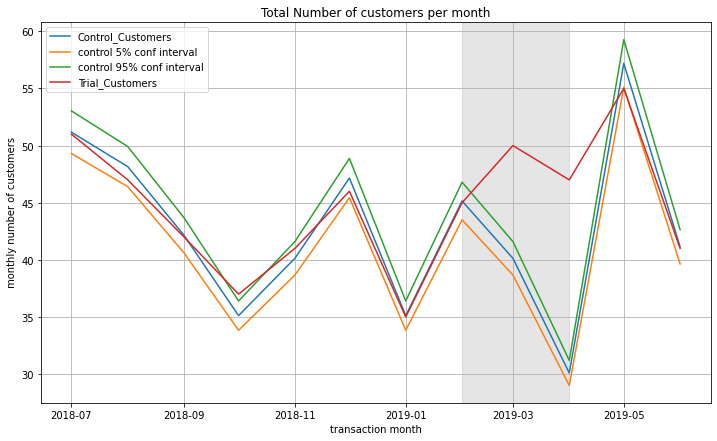

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize = (12, 7))
plt.plot(combined_customers)
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)
plt.legend(['Control_Customers',	'control 5% conf interval',	'control 95% conf interval',	'Trial_Customers'])
plt.xlabel('transaction month')
plt.ylabel(' monthly number of customers')
plt.title('Total Number of customers per month')
plt.grid()

# **Selecting control store for store trial 86**

In [ ]:
trial_store=86
#Calculating correlation
corr_nbr_sales=calculateCorrelation(pre_trial_metrics,'tot_mnthly_sales',trial_store)
corr_nbr_customers=calculateCorrelation(pre_trial_metrics,'mnthly_nbr_of_customers',trial_store)
#Calculating magnitude distance
magnitude_nbr_sales=calculateMagnitudeDistance(pre_trial_metrics,'tot_mnthly_sales',trial_store)
magnitude_nbr_customers=calculateMagnitudeDistance(pre_trial_metrics,'mnthly_nbr_of_customers',trial_store)

In [ ]:
corr_nbr_sales

,Store1,Store2,Correlation
0,86.0,1.0,0.445632
1,86.0,2.0,-0.403835
2,86.0,3.0,-0.261284
3,86.0,4.0,-0.039035
4,86.0,5.0,0.235159
...,...,...,...
255,86.0,268.0,-0.452182
256,86.0,269.0,0.697055
257,86.0,270.0,-0.730679
258,86.0,271.0,0.527637


In [ ]:
corr_nbr_customers

,Store1,Store2,Correlation
0,86.0,1.0,0.485831
1,86.0,2.0,-0.086161
2,86.0,3.0,-0.353786
3,86.0,4.0,-0.169608
4,86.0,5.0,-0.253229
...,...,...,...
255,86.0,268.0,-0.034273
256,86.0,269.0,-0.098587
257,86.0,270.0,-0.767267
258,86.0,271.0,0.267393


In [ ]:
magnitude_nbr_sales


,Store1,Store2,Magnitude
0,86.0,1.0,0.488334
1,86.0,2.0,0.321131
2,86.0,3.0,0.507515
3,86.0,4.0,0.635654
4,86.0,5.0,0.579835
...,...,...,...
255,86.0,268.0,0.291930
256,86.0,269.0,0.480267
257,86.0,270.0,0.517014
258,86.0,271.0,0.565665


In [ ]:
magnitude_nbr_customers

,Store1,Store2,Magnitude
0,86.0,1.0,0.510204
1,86.0,2.0,0.428571
2,86.0,3.0,0.563025
3,86.0,4.0,0.537815
4,86.0,5.0,0.714286
...,...,...,...
255,86.0,268.0,0.566327
256,86.0,269.0,0.581633
257,86.0,270.0,0.650794
258,86.0,271.0,0.598214


In [ ]:
#Concatenate sales magnitude and corrrelation
corr_magn_sales=pd.concat([corr_nbr_sales,magnitude_nbr_sales['Magnitude']],axis=1)
corr_magn_sales

,Store1,Store2,Correlation,Magnitude
0,86.0,1.0,0.445632,0.488334
1,86.0,2.0,-0.403835,0.321131
2,86.0,3.0,-0.261284,0.507515
3,86.0,4.0,-0.039035,0.635654
4,86.0,5.0,0.235159,0.579835
...,...,...,...,...
255,86.0,268.0,-0.452182,0.291930
256,86.0,269.0,0.697055,0.480267
257,86.0,270.0,-0.730679,0.517014
258,86.0,271.0,0.527637,0.565665


In [ ]:

#Concatenate customers magnitude and corrrelation
corr_magn_customers=pd.concat([corr_nbr_customers,magnitude_nbr_customers['Magnitude']],axis=1)
corr_magn_customers

,Store1,Store2,Correlation,Magnitude
0,86.0,1.0,0.485831,0.510204
1,86.0,2.0,-0.086161,0.428571
2,86.0,3.0,-0.353786,0.563025
3,86.0,4.0,-0.169608,0.537815
4,86.0,5.0,-0.253229,0.714286
...,...,...,...,...
255,86.0,268.0,-0.034273,0.566327
256,86.0,269.0,-0.098587,0.581633
257,86.0,270.0,-0.767267,0.650794
258,86.0,271.0,0.267393,0.598214


In [ ]:
# Add an additional column which calculates the weighted average of correlation and magnitude for sales

corr_weight = 0.5
corr_magn_sales['corr_magn_sales_wavg'] = corr_weight * corr_magn_sales['Correlation'] + (1 - corr_weight) * corr_magn_sales['Magnitude']
corr_magn_sales.head()

,Store1,Store2,Correlation,Magnitude,corr_magn_sales_wavg
0,86.0,1.0,0.445632,0.488334,0.466983
1,86.0,2.0,-0.403835,0.321131,-0.041352
2,86.0,3.0,-0.261284,0.507515,0.123116
3,86.0,4.0,-0.039035,0.635654,0.298309
4,86.0,5.0,0.235159,0.579835,0.407497


In [ ]:
# Add an additional column which calculates the weighted average of correlation and magnitude for customers
corr_weight = 0.5
corr_magn_customers['corr_magn_customers_wavg'] = corr_weight * corr_magn_customers['Correlation'] + (1 - corr_weight) * corr_magn_customers['Magnitude']
corr_magn_customers.head()

,Store1,Store2,Correlation,Magnitude,corr_magn_customers_wavg
0,86.0,1.0,0.485831,0.510204,0.498018
1,86.0,2.0,-0.086161,0.428571,0.171205
2,86.0,3.0,-0.353786,0.563025,0.104620
3,86.0,4.0,-0.169608,0.537815,0.184103
4,86.0,5.0,-0.253229,0.714286,0.230528


In [ ]:
corr_magn_sales.set_index(['Store1', 'Store2'], inplace = True)
corr_magn_customers.set_index(['Store1', 'Store2'], inplace = True)

In [ ]:
# Create a new dataframe 'score_Control' which takes the average of 'scoreNSales' and 'scoreNCust'

score_Control = pd.concat([corr_magn_sales['corr_magn_sales_wavg'], corr_magn_customers['corr_magn_customers_wavg']] ,axis = 1)
score_Control

corr_magn_sales_wavg  corr_magn_customers_wavg
Store1 Store2                                                
86.0   1.0                 0.466983                  0.498018
       2.0                -0.041352                  0.171205
       3.0                 0.123116                  0.104620
       4.0                 0.298309                  0.184103
       5.0                 0.407497                  0.230528
...                             ...                       ...
       268.0              -0.080126                  0.266027
       269.0               0.588661                  0.241523
       270.0              -0.106832                 -0.058237
       271.0               0.546651                  0.432804
       272.0               0.294383                  0.139863

[260 rows x 2 columns]

In [ ]:
# Add a new column to 'score_Control' which computes the average of 'corr_magn_sales_wavg' and 'corr_magn_customers_wavg'

score_Control['finalControlScore'] = 0.5 * (score_Control['corr_magn_sales_wavg'] + score_Control['corr_magn_customers_wavg'])
score_Control.head()

corr_magn_sales_wavg  ...  finalControlScore
Store1 Store2                        ...                   
86.0   1.0                 0.466983  ...           0.482500
       2.0                -0.041352  ...           0.064927
       3.0                 0.123116  ...           0.113868
       4.0                 0.298309  ...           0.241206
       5.0                 0.407497  ...           0.319013

[5 rows x 3 columns]

In [ ]:
#Sorting the stores by highest final control score
score_Control.sort_values(by = 'finalControlScore', ascending = False).head()


corr_magn_sales_wavg  ...  finalControlScore
Store1 Store2                        ...                   
86.0   155.0               0.808106  ...           0.770724
       109.0               0.697120  ...           0.719826
       114.0               0.631393  ...           0.647389
       225.0               0.601841  ...           0.643099
       138.0               0.593296  ...           0.626930

[5 rows x 3 columns]

In [ ]:
#Examining the  metrics similarity of store 155 and store 86 prior to the trial period
#Setting control store as 155
control_store=155

past_sales = pre_trial_metrics

# Create a new column within 'past_sales' which categorises store type
store_type = []

for i in past_sales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

past_sales['store_type'] = store_type
past_sales.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,store_type,Transaction_Month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,Other Stores,2018-11-01


In [ ]:
past_sales['store_type'].unique()

array(['Other Stores', 'Trial Store', 'Control Store'], dtype=object)

In [ ]:
past_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   STORE_NBR                    1820 non-null   int64         
 1   MONTHLY                      1820 non-null   int64         
 2   tot_mnthly_sales             1820 non-null   float64       
 3   mnthly_nbr_of_customers      1820 non-null   int64         
 4   mnthly_transaction_pr_cstmr  1820 non-null   float64       
 5   avg_mnthly_price             1820 non-null   float64       
 6   chips_per_transaction        1820 non-null   float64       
 7   store_type                   1820 non-null   object        
 8   Transaction_Month            1820 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 142.2+ KB


In [ ]:
#Changing format of monthly column from 'int64' to 'datetime object'

past_sales['Transaction_Month'] = pd.to_datetime(past_sales['MONTHLY'].astype(str), format = '%Y%m')
past_sales.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,store_type,Transaction_Month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,Other Stores,2018-11-01


In [ ]:
past_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   STORE_NBR                    1820 non-null   int64         
 1   MONTHLY                      1820 non-null   int64         
 2   tot_mnthly_sales             1820 non-null   float64       
 3   mnthly_nbr_of_customers      1820 non-null   int64         
 4   mnthly_transaction_pr_cstmr  1820 non-null   float64       
 5   avg_mnthly_price             1820 non-null   float64       
 6   chips_per_transaction        1820 non-null   float64       
 7   store_type                   1820 non-null   object        
 8   Transaction_Month            1820 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 142.2+ KB


In [ ]:
#Create dataframes
#Control Store
control_store_sales = past_sales.loc[past_sales['store_type'] == 'Control Store', ['Transaction_Month', 'tot_mnthly_sales']]
control_store_sales.set_index('Transaction_Month', inplace = True)
control_store_sales.rename(columns = {'tot_mnthly_sales ': 'Control_Store_Sales'}, inplace = True)

#Trial Store
trial_store_sales = past_sales.loc[past_sales['store_type'] == 'Trial Store', ['Transaction_Month', 'tot_mnthly_sales']]
trial_store_sales.set_index('Transaction_Month', inplace = True)
trial_store_sales.rename(columns = {'tot_mnthly_sales ': 'Trial_Store_Sales'}, inplace = True)

#Other Stores
other_store_sales = past_sales.loc[past_sales['store_type'] == 'Other Stores', ['Transaction_Month', 'tot_mnthly_sales']]
other_store_sales = pd.DataFrame(other_store_sales.groupby('Transaction_Month').tot_mnthly_sales.mean())
other_store_sales.rename(columns = {'tot_mnthly_sales ': 'Other_Stores_Sales'}, inplace = True)



In [ ]:
#Combining the dataframes
combined_stores_sales=pd.concat([control_store_sales,trial_store_sales,other_store_sales],axis=1)
combined_stores_sales

,tot_mnthly_sales,tot_mnthly_sales,tot_mnthly_sales
Transaction_Month,,,
2018-07-01,924.6,892.20,633.239922
2018-08-01,782.7,764.05,606.326744
2018-09-01,1014.4,914.60,614.480620
2018-10-01,963.8,948.40,629.415504
2018-11-01,898.8,918.00,613.593411
2018-12-01,849.8,841.20,644.020155
2019-01-01,874.6,841.40,623.513566


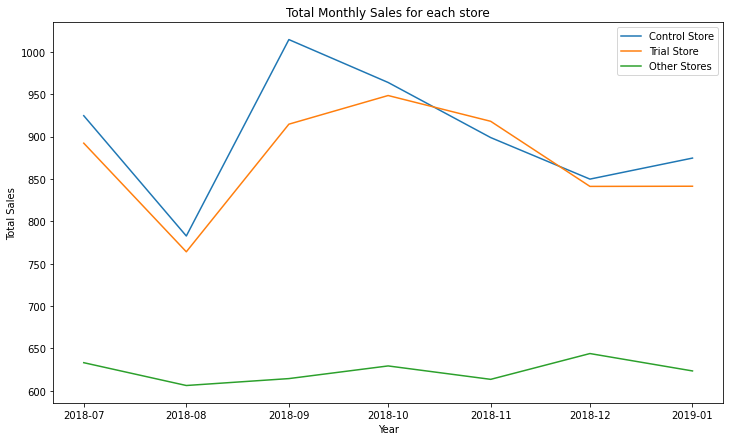

In [ ]:
#Plotting combined monthly sales for each store
plt.figure(figsize=(12,7))
plt.plot(combined_stores_sales)
plt.title('Total Monthly Sales for each store')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(['Control Store','Trial Store','Other Stores'])

# **Visualisation for *Control Store,Trial Store & Other Stores* using mnthly_nbr_of_customers**

In [ ]:
#Create dataframes
#Control Store
control_store_customers = past_sales.loc[past_sales['store_type'] == 'Control Store', ['Transaction_Month', 'mnthly_nbr_of_customers']]
control_store_customers.set_index('Transaction_Month', inplace = True)
control_store_customers.rename(columns = {'mnthly_nbr_of_customers ': 'Control_Store_Customers'}, inplace = True)

#Trial Store
trial_store_customers = past_sales.loc[past_sales['store_type'] == 'Trial Store', ['Transaction_Month', 'mnthly_nbr_of_customers']]
trial_store_customers.set_index('Transaction_Month', inplace = True)
trial_store_customers.rename(columns = {'mnthly_nbr_of_customers ': 'Trial_Store_Customers'}, inplace = True)

#Other Stores
other_store_customers = past_sales.loc[past_sales['store_type'] == 'Other Stores', ['Transaction_Month', 'mnthly_nbr_of_customers']]
other_store_customers = pd.DataFrame(other_store_customers.groupby('Transaction_Month').mnthly_nbr_of_customers.mean())
other_store_customers.rename(columns = {'mnthly_nbr_of_customers': 'Other_Stores_Customers'}, inplace = True)



In [ ]:
#Combining the dataframes
combined_stores_customers=pd.concat([control_store_customers,trial_store_customers,other_store_customers],axis=1)
combined_stores_customers

,mnthly_nbr_of_customers,mnthly_nbr_of_customers,Other_Stores_Customers
Transaction_Month,,,
2018-07-01,101,99,71.953488
2018-08-01,91,94,71.771318
2018-09-01,103,103,69.658915
2018-10-01,108,109,71.046512
2018-11-01,101,100,70.069767
2018-12-01,97,98,73.120155
2019-01-01,96,94,70.775194


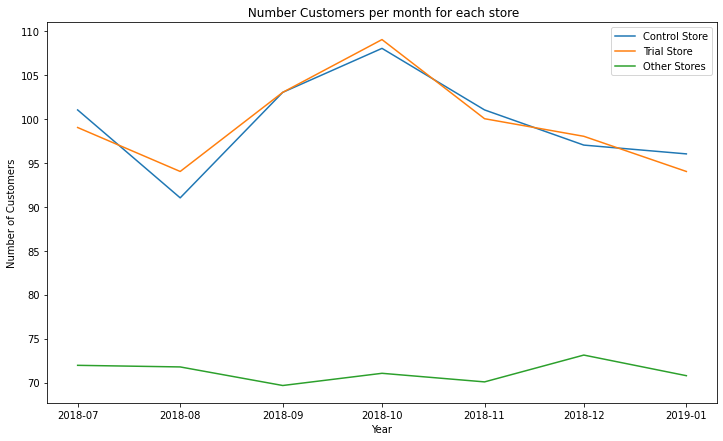

In [ ]:
#Plotting combined number of customers for each store
plt.figure(figsize=(12,7))
plt.plot(combined_stores_customers)
plt.title(' Number Customers per month for each store')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.legend(['Control Store','Trial Store','Other Stores'])

# **Pre-trial assessment for store 86**
The trial period goes from the start of February 2019 to end of April 2019. We now want to see if there has been an uplift in overall chip sales.

# **By Sales:**

In [ ]:
#Scale pre-trial control sales to match pre-trial trial store sales
#We compute this by dividing sum of 'tot_mnthly_sales' for trial store by sum of 'tot_mnthly_sales' for control store
tot_trial_sales = pre_trial_metrics.loc[pre_trial_metrics['store_type'] == 'Trial Store' , 'tot_mnthly_sales'].sum()
tot_control_sales = pre_trial_metrics.loc[pre_trial_metrics['store_type'] == 'Control Store', 'tot_mnthly_sales'].sum()
Scaling_Factor_Sales =tot_trial_sales / tot_control_sales
Scaling_Factor_Sales 



0.9700651481287746

In [ ]:
monthly_store_metrics.head()

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
Scaled_control_sales = monthly_store_metrics
Scaled_control_sales.head()

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
Scaled_control_sales=Scaled_control_sales.loc[Scaled_control_sales['STORE_NBR'] == 155]
Scaled_control_sales

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
1793,155,201807,924.60,101,1.217822,3.698400,2.032520,2018-07-01
1794,155,201808,782.70,91,1.307692,3.417904,1.924370,2018-08-01
1795,155,201809,1014.40,103,1.398058,3.497931,2.013889,2018-09-01
1796,155,201810,963.80,108,1.259259,3.543382,2.000000,2018-10-01
1797,155,201811,898.80,101,1.316832,3.328889,2.030075,2018-11-01
1798,155,201812,849.80,97,1.237113,3.511570,2.016667,2018-12-01
1799,155,201901,874.60,96,1.302083,3.470635,2.016000,2019-01-01
1800,155,201902,891.20,95,1.315789,3.508661,2.032000,2019-02-01
1801,155,201903,804.40,94,1.255319,3.351667,2.033898,2019-03-01
1802,155,201904,844.60,99,1.212121,3.490083,2.016667,2019-04-01


In [ ]:
# Create a column which applies 'Scaling_Factor_Sales' to 'tot_mnthly_sales' column
Scaled_control_sales['Control_Sales']=Scaled_control_sales['tot_mnthly_sales']* Scaling_Factor_Sales
Scaled_control_sales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Sales
1793,155,201807,924.60,101,1.217822,3.698400,2.032520,2018-07-01,896.922236
1794,155,201808,782.70,91,1.307692,3.417904,1.924370,2018-08-01,759.269991
1795,155,201809,1014.40,103,1.398058,3.497931,2.013889,2018-09-01,984.034086
1796,155,201810,963.80,108,1.259259,3.543382,2.000000,2018-10-01,934.948790
1797,155,201811,898.80,101,1.316832,3.328889,2.030075,2018-11-01,871.894555
1798,155,201812,849.80,97,1.237113,3.511570,2.016667,2018-12-01,824.361363
1799,155,201901,874.60,96,1.302083,3.470635,2.016000,2019-01-01,848.418979
1800,155,201902,891.20,95,1.315789,3.508661,2.032000,2019-02-01,864.522060
1801,155,201903,804.40,94,1.255319,3.351667,2.033898,2019-03-01,780.320405
1802,155,201904,844.60,99,1.212121,3.490083,2.016667,2019-04-01,819.317024


In [ ]:
# Create 'percentage_diff' dataframe
percentage_diff = Scaled_control_sales[['MONTHLY', 'Control_Sales']]
percentage_diff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'tot_mnthly_sales'
trial_sales = monthly_store_metrics.loc[monthly_store_metrics['STORE_NBR'] == trial_store, 'tot_mnthly_sales']
trial_sales.reset_index(drop = True, inplace = True)
percentage_diff = pd.concat([percentage_diff, trial_sales], axis = 1)
percentage_diff.rename(columns = {'tot_mnthly_sales': 'trial_sales'}, inplace = True)

percentage_diff

,MONTHLY,Control_Sales,trial_sales
0,201807,896.922236,892.20
1,201808,759.269991,764.05
2,201809,984.034086,914.60
3,201810,934.948790,948.40
4,201811,871.894555,918.00
5,201812,824.361363,841.20
6,201901,848.418979,841.40
7,201902,864.522060,913.20
8,201903,780.320405,1026.80
9,201904,819.317024,848.20


In [ ]:
# Calculate percentage difference and put it in a new column

percentage_diff['percentage_diff'] = abs(percentage_diff.Control_Sales - percentage_diff.trial_sales) / percentage_diff.Control_Sales
percentage_diff

,MONTHLY,Control_Sales,trial_sales,percentage_diff
0,201807,896.922236,892.20,0.005265
1,201808,759.269991,764.05,0.006296
2,201809,984.034086,914.60,0.070561
3,201810,934.948790,948.40,0.014387
4,201811,871.894555,918.00,0.052880
5,201812,824.361363,841.20,0.020426
6,201901,848.418979,841.40,0.008273
7,201902,864.522060,913.20,0.056306
8,201903,780.320405,1026.80,0.315870
9,201904,819.317024,848.20,0.035253


In [ ]:
#Null hypothesis:trial period== pre_trial period
#SD on %diff in pre trial period
from statistics import stdev
std_dev=stdev(percentage_diff.loc[percentage_diff['MONTHLY'] < 201902,'percentage_diff'])
std_dev

0.025833952854772586

In [ ]:
#Testing null hypothesis create a new column to compute the t-statistic
percentage_diff['t-calc']=(percentage_diff['percentage_diff'] - 0)/std_dev
percentage_diff.loc[(percentage_diff['MONTHLY'] > 201901) & (percentage_diff['MONTHLY'] < 201905) , 't-calc']

7     2.179542
8    12.226922
9     1.364580
Name: t-calc, dtype: float64

In [ ]:
#Degrees of freedom =n-1
#In our case n is the number of months for the pre-trial period which is 8
#So df=7
#Find 95% conf interval with 7 df
from scipy.stats import t 
df=7
t.isf(0.05,df)


1.8945786050613054

In [ ]:
#Add a new column to our scaled control sales for the transaction month
Scaled_control_sales['txn_month']=pd.to_datetime(Scaled_control_sales['MONTHLY'].astype(str),format='%Y%m')
Scaled_control_sales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Sales
1793,155,201807,924.60,101,1.217822,3.698400,2.032520,2018-07-01,896.922236
1794,155,201808,782.70,91,1.307692,3.417904,1.924370,2018-08-01,759.269991
1795,155,201809,1014.40,103,1.398058,3.497931,2.013889,2018-09-01,984.034086
1796,155,201810,963.80,108,1.259259,3.543382,2.000000,2018-10-01,934.948790
1797,155,201811,898.80,101,1.316832,3.328889,2.030075,2018-11-01,871.894555
1798,155,201812,849.80,97,1.237113,3.511570,2.016667,2018-12-01,824.361363
1799,155,201901,874.60,96,1.302083,3.470635,2.016000,2019-01-01,848.418979
1800,155,201902,891.20,95,1.315789,3.508661,2.032000,2019-02-01,864.522060
1801,155,201903,804.40,94,1.255319,3.351667,2.033898,2019-03-01,780.320405
1802,155,201904,844.60,99,1.212121,3.490083,2.016667,2019-04-01,819.317024


In [ ]:
control_store_sales=Scaled_control_sales.loc[:,['txn_month','Control_Sales']]
control_store_sales.set_index('txn_month',inplace=True)
control_store_sales

,Control_Sales
txn_month,
2018-07-01,896.922236
2018-08-01,759.269991
2018-09-01,984.034086
2018-10-01,934.948790
2018-11-01,871.894555
2018-12-01,824.361363
2019-01-01,848.418979
2019-02-01,864.522060
2019-03-01,780.320405


In [ ]:
monthly_store_metrics['txn_month'] = pd.to_datetime(monthly_store_metrics['MONTHLY'].astype(str), format = '%Y%m')
monthly_store_metrics.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
trial_store_sales = monthly_store_metrics.loc[monthly_store_metrics['STORE_NBR'] == trial_store, ['txn_month', 'tot_mnthly_sales']]
trial_store_sales.set_index('txn_month', inplace = True)
trial_store_sales.rename(columns = {'tot_mnthly_sales': 'Trial_Sales'}, inplace = True)
trial_store_sales

,Trial_Sales
txn_month,
2018-07-01,892.20
2018-08-01,764.05
2018-09-01,914.60
2018-10-01,948.40
2018-11-01,918.00
2018-12-01,841.20
2019-01-01,841.40
2019-02-01,913.20
2019-03-01,1026.80


In [ ]:
control_store_sales['control 5% conf interval']=control_store_sales['Control_Sales']*(1-std_dev*2)
control_store_sales['control 95% conf interval']=control_store_sales['Control_Sales']*(1+std_dev*2)
control_store_sales

,Control_Sales,control 5% conf interval,control 95% conf interval
txn_month,,,
2018-07-01,896.922236,850.580142,943.264329
2018-08-01,759.269991,720.040101,798.499882
2018-09-01,984.034086,933.191106,1034.877067
2018-10-01,934.948790,886.641944,983.255636
2018-11-01,871.894555,826.845589,916.943521
2018-12-01,824.361363,781.768338,866.954388
2019-01-01,848.418979,804.582947,892.255010
2019-02-01,864.522060,819.854016,909.190104
2019-03-01,780.320405,740.002884,820.637926


In [ ]:
combined_sales=pd.merge(control_store_sales,trial_store_sales,left_index=True,right_index=True)
combined_sales

,Control_Sales,control 5% conf interval,control 95% conf interval,Trial_Sales
txn_month,,,,
2018-07-01,896.922236,850.580142,943.264329,892.20
2018-08-01,759.269991,720.040101,798.499882,764.05
2018-09-01,984.034086,933.191106,1034.877067,914.60
2018-10-01,934.948790,886.641944,983.255636,948.40
2018-11-01,871.894555,826.845589,916.943521,918.00
2018-12-01,824.361363,781.768338,866.954388,841.20
2019-01-01,848.418979,804.582947,892.255010,841.40
2019-02-01,864.522060,819.854016,909.190104,913.20
2019-03-01,780.320405,740.002884,820.637926,1026.80


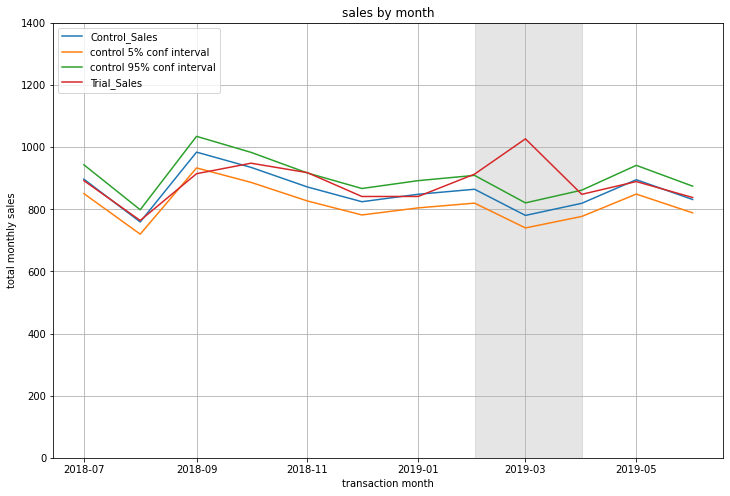

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize = (12, 8))
plt.plot(combined_sales)
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)
plt.legend(['Control_Sales',	'control 5% conf interval',	'control 95% conf interval',	'Trial_Sales'])
plt.ylim((0, 1400))
plt.xlabel('transaction month')
plt.ylabel('total monthly sales')
plt.title('sales by month')
plt.grid()

# **By Customers:**

In [ ]:
#Scale pre-trial control customers to match pre-trial trial store customers
#We compute this by dividing sum of 'mnthly_nbr_of_customers' for trial store by sum of 'mnthly_nbr_of_customers' for control store
tot_trial_customers = pre_trial_metrics.loc[pre_trial_metrics['store_type'] == 'Trial Store' , 'mnthly_nbr_of_customers'].sum()
tot_control_customers = pre_trial_metrics.loc[pre_trial_metrics['store_type'] == 'Control Store', 'mnthly_nbr_of_customers'].sum()
Scaling_Factor_Customers =tot_trial_customers / tot_control_customers
Scaling_Factor_Customers


1.0

In [ ]:
Scaled_control_customers = monthly_store_metrics
Scaled_control_customers.head()

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
Scaled_control_customers=Scaled_control_customers.loc[Scaled_control_customers['STORE_NBR'] == 155]
Scaled_control_customers

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
1793,155,201807,924.60,101,1.217822,3.698400,2.032520,2018-07-01
1794,155,201808,782.70,91,1.307692,3.417904,1.924370,2018-08-01
1795,155,201809,1014.40,103,1.398058,3.497931,2.013889,2018-09-01
1796,155,201810,963.80,108,1.259259,3.543382,2.000000,2018-10-01
1797,155,201811,898.80,101,1.316832,3.328889,2.030075,2018-11-01
1798,155,201812,849.80,97,1.237113,3.511570,2.016667,2018-12-01
1799,155,201901,874.60,96,1.302083,3.470635,2.016000,2019-01-01
1800,155,201902,891.20,95,1.315789,3.508661,2.032000,2019-02-01
1801,155,201903,804.40,94,1.255319,3.351667,2.033898,2019-03-01
1802,155,201904,844.60,99,1.212121,3.490083,2.016667,2019-04-01


In [ ]:
# Create a column which applies 'Scaling_Factor_Sales' to 'tot_mnthly_sales' column
Scaled_control_customers['Control_Customers']=Scaled_control_customers['mnthly_nbr_of_customers']* Scaling_Factor_Customers
Scaled_control_customers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Customers
1793,155,201807,924.60,101,1.217822,3.698400,2.032520,2018-07-01,101.0
1794,155,201808,782.70,91,1.307692,3.417904,1.924370,2018-08-01,91.0
1795,155,201809,1014.40,103,1.398058,3.497931,2.013889,2018-09-01,103.0
1796,155,201810,963.80,108,1.259259,3.543382,2.000000,2018-10-01,108.0
1797,155,201811,898.80,101,1.316832,3.328889,2.030075,2018-11-01,101.0
1798,155,201812,849.80,97,1.237113,3.511570,2.016667,2018-12-01,97.0
1799,155,201901,874.60,96,1.302083,3.470635,2.016000,2019-01-01,96.0
1800,155,201902,891.20,95,1.315789,3.508661,2.032000,2019-02-01,95.0
1801,155,201903,804.40,94,1.255319,3.351667,2.033898,2019-03-01,94.0
1802,155,201904,844.60,99,1.212121,3.490083,2.016667,2019-04-01,99.0


In [ ]:

Scaled_control_customers['Control_Customers'] = Scaled_control_customers['mnthly_nbr_of_customers'] * Scaling_Factor_Customers
Scaled_control_customers.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Customers
1793,155,201807,924.6,101,1.217822,3.698400,2.032520,2018-07-01,101.0
1794,155,201808,782.7,91,1.307692,3.417904,1.924370,2018-08-01,91.0
1795,155,201809,1014.4,103,1.398058,3.497931,2.013889,2018-09-01,103.0
1796,155,201810,963.8,108,1.259259,3.543382,2.000000,2018-10-01,108.0
1797,155,201811,898.8,101,1.316832,3.328889,2.030075,2018-11-01,101.0


In [ ]:
# Create 'percentage_diff' dataframe
percentage_diff = Scaled_control_customers[['MONTHLY', 'Control_Customers']]
percentage_diff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'mnthly_nbr_customers'
trial_customers = monthly_store_metrics.loc[monthly_store_metrics['STORE_NBR'] == trial_store, 'mnthly_nbr_of_customers']
trial_customers.reset_index(drop = True, inplace = True)
percentage_diff = pd.concat([percentage_diff, trial_customers], axis = 1)
percentage_diff.rename(columns = {'mnthly_nbr_of_customers': 'trial_customers'}, inplace = True)

percentage_diff

,MONTHLY,Control_Customers,trial_customers
0,201807,101.0,99
1,201808,91.0,94
2,201809,103.0,103
3,201810,108.0,109
4,201811,101.0,100
5,201812,97.0,98
6,201901,96.0,94
7,201902,95.0,107
8,201903,94.0,115
9,201904,99.0,105


In [ ]:
# Calculate percentage difference and put it in a new column

percentage_diff['percentage_diff'] = abs(percentage_diff.Control_Customers - percentage_diff.trial_customers) / percentage_diff.Control_Customers
percentage_diff

,MONTHLY,Control_Customers,trial_customers,percentage_diff
0,201807,101.0,99,0.019802
1,201808,91.0,94,0.032967
2,201809,103.0,103,0.000000
3,201810,108.0,109,0.009259
4,201811,101.0,100,0.009901
5,201812,97.0,98,0.010309
6,201901,96.0,94,0.020833
7,201902,95.0,107,0.126316
8,201903,94.0,115,0.223404
9,201904,99.0,105,0.060606


In [ ]:
#Null hypothesis:trial period== pre_trial period
#SD on %diff in pre trial period
from statistics import stdev
std_dev=stdev(percentage_diff.loc[percentage_diff['MONTHLY'] < 201902,'percentage_diff'])
std_dev

0.010687444701395236

In [ ]:
#Testing null hypothesis create a new column to compute the t-statistic
percentage_diff['t-calc']=(percentage_diff['percentage_diff'] - 0)/std_dev
percentage_diff.loc[(percentage_diff['MONTHLY'] > 201901) & (percentage_diff['MONTHLY'] < 201905) , 't-calc']

7    11.819082
8    20.903430
9     5.670772
Name: t-calc, dtype: float64

In [ ]:
#Degrees of freedom =n-1
#In our case n is the number of months for the pre-trial period which is 8
#So df=7
#Find 95% conf interval with 7 df
from scipy.stats import t 
df=7
t.isf(0.05,df)


1.8945786050613054

In [ ]:
#Add a new column to our scaled control sales for the transaction month
Scaled_control_customers['txn_month']=pd.to_datetime(Scaled_control_customers['MONTHLY'].astype(str),format='%Y%m')
Scaled_control_customers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Customers
1793,155,201807,924.60,101,1.217822,3.698400,2.032520,2018-07-01,101.0
1794,155,201808,782.70,91,1.307692,3.417904,1.924370,2018-08-01,91.0
1795,155,201809,1014.40,103,1.398058,3.497931,2.013889,2018-09-01,103.0
1796,155,201810,963.80,108,1.259259,3.543382,2.000000,2018-10-01,108.0
1797,155,201811,898.80,101,1.316832,3.328889,2.030075,2018-11-01,101.0
1798,155,201812,849.80,97,1.237113,3.511570,2.016667,2018-12-01,97.0
1799,155,201901,874.60,96,1.302083,3.470635,2.016000,2019-01-01,96.0
1800,155,201902,891.20,95,1.315789,3.508661,2.032000,2019-02-01,95.0
1801,155,201903,804.40,94,1.255319,3.351667,2.033898,2019-03-01,94.0
1802,155,201904,844.60,99,1.212121,3.490083,2.016667,2019-04-01,99.0


In [ ]:
control_store_customers=Scaled_control_customers.loc[:,['txn_month','Control_Customers']]
control_store_customers.set_index('txn_month',inplace=True)
control_store_customers

,Control_Customers
txn_month,
2018-07-01,101.0
2018-08-01,91.0
2018-09-01,103.0
2018-10-01,108.0
2018-11-01,101.0
2018-12-01,97.0
2019-01-01,96.0
2019-02-01,95.0
2019-03-01,94.0


In [ ]:
monthly_store_metrics['txn_month'] = pd.to_datetime(monthly_store_metrics['MONTHLY'].astype(str), format = '%Y%m')
monthly_store_metrics.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
trial_store_customers = monthly_store_metrics.loc[monthly_store_metrics['STORE_NBR'] == 86, ['txn_month', 'mnthly_nbr_of_customers']]
trial_store_customers.set_index('txn_month', inplace = True)
trial_store_customers.rename(columns = {'mnthly_nbr_of_customers': 'Trial_Customers'}, inplace = True)
trial_store_customers

,Trial_Customers
txn_month,
2018-07-01,99
2018-08-01,94
2018-09-01,103
2018-10-01,109
2018-11-01,100
2018-12-01,98
2019-01-01,94
2019-02-01,107
2019-03-01,115


In [ ]:
control_store_customers['control 5% conf interval']=control_store_customers['Control_Customers']*(1-std_dev*2)
control_store_customers['control 95% conf interval']=control_store_customers['Control_Customers']*(1+std_dev*2)
control_store_customers

,Control_Customers,control 5% conf interval,control 95% conf interval
txn_month,,,
2018-07-01,101.0,98.841136,103.158864
2018-08-01,91.0,89.054885,92.945115
2018-09-01,103.0,100.798386,105.201614
2018-10-01,108.0,105.691512,110.308488
2018-11-01,101.0,98.841136,103.158864
2018-12-01,97.0,94.926636,99.073364
2019-01-01,96.0,93.948011,98.051989
2019-02-01,95.0,92.969386,97.030614
2019-03-01,94.0,91.990760,96.009240


In [ ]:
combined_customers=pd.merge(control_store_customers,trial_store_customers,left_index=True,right_index=True)
combined_customers

,Control_Customers,control 5% conf interval,control 95% conf interval,Trial_Customers
txn_month,,,,
2018-07-01,101.0,98.841136,103.158864,99
2018-08-01,91.0,89.054885,92.945115,94
2018-09-01,103.0,100.798386,105.201614,103
2018-10-01,108.0,105.691512,110.308488,109
2018-11-01,101.0,98.841136,103.158864,100
2018-12-01,97.0,94.926636,99.073364,98
2019-01-01,96.0,93.948011,98.051989,94
2019-02-01,95.0,92.969386,97.030614,107
2019-03-01,94.0,91.990760,96.009240,115


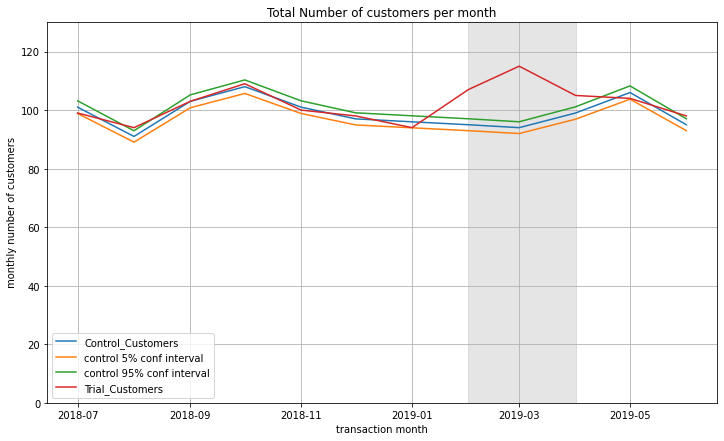

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize = (12, 7))
plt.plot(combined_customers)
plt.ylim((0, 130))
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)
plt.legend(['Control_Customers',	'control 5% conf interval',	'control 95% conf interval',	'Trial_Customers'])
plt.xlabel('transaction month')
plt.ylabel(' monthly number of customers')
plt.title('Total Number of customers per month')
plt.grid()

# **Selecting control store for trial store 88**

In [ ]:
trial_store=88
#Calculating correlation
corr_nbr_sales=calculateCorrelation(pre_trial_metrics,'tot_mnthly_sales',trial_store)
corr_nbr_customers=calculateCorrelation(pre_trial_metrics,'mnthly_nbr_of_customers',trial_store)
#Calculating magnitude distance
magnitude_nbr_sales=calculateMagnitudeDistance(pre_trial_metrics,'tot_mnthly_sales',trial_store)
magnitude_nbr_customers=calculateMagnitudeDistance(pre_trial_metrics,'mnthly_nbr_of_customers',trial_store)

In [ ]:
corr_nbr_sales

,Store1,Store2,Correlation
0,88.0,1.0,0.813636
1,88.0,2.0,-0.067927
2,88.0,3.0,-0.507847
3,88.0,4.0,-0.745566
4,88.0,5.0,0.190330
...,...,...,...
255,88.0,268.0,-0.021429
256,88.0,269.0,-0.172578
257,88.0,270.0,-0.723272
258,88.0,271.0,-0.103037


In [ ]:
corr_nbr_customers

,Store1,Store2,Correlation
0,88.0,1.0,0.305334
1,88.0,2.0,-0.452379
2,88.0,3.0,0.522884
3,88.0,4.0,-0.361503
4,88.0,5.0,-0.025320
...,...,...,...
255,88.0,268.0,0.672672
256,88.0,269.0,-0.274781
257,88.0,270.0,-0.103032
258,88.0,271.0,-0.018831


In [ ]:
magnitude_nbr_sales


,Store1,Store2,Magnitude
0,88.0,1.0,0.548959
1,88.0,2.0,0.541212
2,88.0,3.0,0.458109
3,88.0,4.0,0.484447
4,88.0,5.0,0.496409
...,...,...,...
255,88.0,268.0,0.522847
256,88.0,269.0,0.564856
257,88.0,270.0,0.513329
258,88.0,271.0,0.429220


In [ ]:
magnitude_nbr_customers

,Store1,Store2,Magnitude
0,88.0,1.0,0.357143
1,88.0,2.0,0.285714
2,88.0,3.0,0.683673
3,88.0,4.0,0.577922
4,88.0,5.0,0.558442
...,...,...,...
255,88.0,268.0,0.630252
256,88.0,269.0,0.360902
257,88.0,270.0,0.367965
258,88.0,271.0,0.655844


In [ ]:
#Concatenate sales magnitude and corrrelation
corr_magn_sales=pd.concat([corr_nbr_sales,magnitude_nbr_sales['Magnitude']],axis=1)
corr_magn_sales

,Store1,Store2,Correlation,Magnitude
0,88.0,1.0,0.813636,0.548959
1,88.0,2.0,-0.067927,0.541212
2,88.0,3.0,-0.507847,0.458109
3,88.0,4.0,-0.745566,0.484447
4,88.0,5.0,0.190330,0.496409
...,...,...,...,...
255,88.0,268.0,-0.021429,0.522847
256,88.0,269.0,-0.172578,0.564856
257,88.0,270.0,-0.723272,0.513329
258,88.0,271.0,-0.103037,0.429220


In [ ]:

#Concatenate customers magnitude and corrrelation
corr_magn_customers=pd.concat([corr_nbr_customers,magnitude_nbr_customers['Magnitude']],axis=1)
corr_magn_customers

,Store1,Store2,Correlation,Magnitude
0,88.0,1.0,0.305334,0.357143
1,88.0,2.0,-0.452379,0.285714
2,88.0,3.0,0.522884,0.683673
3,88.0,4.0,-0.361503,0.577922
4,88.0,5.0,-0.025320,0.558442
...,...,...,...,...
255,88.0,268.0,0.672672,0.630252
256,88.0,269.0,-0.274781,0.360902
257,88.0,270.0,-0.103032,0.367965
258,88.0,271.0,-0.018831,0.655844


In [ ]:
# Add an additional column which calculates the weighted average of correlation and magnitude for sales

corr_weight = 0.5
corr_magn_sales['corr_magn_sales_wavg'] = corr_weight * corr_magn_sales['Correlation'] + (1 - corr_weight) * corr_magn_sales['Magnitude']
corr_magn_sales.head()

,Store1,Store2,Correlation,Magnitude,corr_magn_sales_wavg
0,88.0,1.0,0.813636,0.548959,0.681297
1,88.0,2.0,-0.067927,0.541212,0.236643
2,88.0,3.0,-0.507847,0.458109,-0.024869
3,88.0,4.0,-0.745566,0.484447,-0.130559
4,88.0,5.0,0.190330,0.496409,0.343370


In [ ]:
# Add an additional column which calculates the weighted average of correlation and magnitude for customers
corr_weight = 0.5
corr_magn_customers['corr_magn_customers_wavg'] = corr_weight * corr_magn_customers['Correlation'] + (1 - corr_weight) * corr_magn_customers['Magnitude']
corr_magn_customers.head()

,Store1,Store2,Correlation,Magnitude,corr_magn_customers_wavg
0,88.0,1.0,0.305334,0.357143,0.331238
1,88.0,2.0,-0.452379,0.285714,-0.083332
2,88.0,3.0,0.522884,0.683673,0.603279
3,88.0,4.0,-0.361503,0.577922,0.108210
4,88.0,5.0,-0.025320,0.558442,0.266561


In [ ]:
corr_magn_sales.set_index(['Store1', 'Store2'], inplace = True)
corr_magn_customers.set_index(['Store1', 'Store2'], inplace = True)

In [ ]:
# Create a new dataframe 'score_Control' which takes the average of 'scoreNSales' and 'scoreNCust'

score_Control = pd.concat([corr_magn_sales['corr_magn_sales_wavg'], corr_magn_customers['corr_magn_customers_wavg']] ,axis = 1)
score_Control

corr_magn_sales_wavg  corr_magn_customers_wavg
Store1 Store2                                                
88.0   1.0                 0.681297                  0.331238
       2.0                 0.236643                 -0.083332
       3.0                -0.024869                  0.603279
       4.0                -0.130559                  0.108210
       5.0                 0.343370                  0.266561
...                             ...                       ...
       268.0               0.250709                  0.651462
       269.0               0.196139                  0.043061
       270.0              -0.104971                  0.132467
       271.0               0.163091                  0.318507
       272.0              -0.077482                  0.237944

[260 rows x 2 columns]

In [ ]:
# Add a new column to 'score_Control' which computes the average of 'corr_magn_sales_wavg' and 'corr_magn_customers_wavg'

score_Control['finalControlScore'] = 0.5 * (score_Control['corr_magn_sales_wavg'] + score_Control['corr_magn_customers_wavg'])
score_Control.head()

corr_magn_sales_wavg  ...  finalControlScore
Store1 Store2                        ...                   
88.0   1.0                 0.681297  ...           0.506268
       2.0                 0.236643  ...           0.076655
       3.0                -0.024869  ...           0.289205
       4.0                -0.130559  ...          -0.011175
       5.0                 0.343370  ...           0.304965

[5 rows x 3 columns]

In [ ]:
#Sorting the stores by highest final control score
score_Control.sort_values(by = 'finalControlScore', ascending = False).head()


corr_magn_sales_wavg  ...  finalControlScore
Store1 Store2                        ...                   
88.0   178.0               0.650803  ...           0.679316
       14.0                0.646064  ...           0.665919
       134.0               0.775084  ...           0.657619
       237.0               0.451974  ...           0.614604
       187.0               0.616752  ...           0.605656

[5 rows x 3 columns]

In [ ]:
#Examining the  metrics similarity of store 178 and store 88 prior to the trial period
#Setting control store as 178
control_store=178

past_sales = pre_trial_metrics

# Create a new column within 'past_sales' which categorises store type
store_type = []

for i in past_sales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

past_sales['store_type'] = store_type
past_sales.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,store_type,Transaction_Month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,Other Stores,2018-11-01


In [ ]:
past_sales['store_type'].unique()

array(['Other Stores', 'Trial Store', 'Control Store'], dtype=object)

In [ ]:
past_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   STORE_NBR                    1820 non-null   int64         
 1   MONTHLY                      1820 non-null   int64         
 2   tot_mnthly_sales             1820 non-null   float64       
 3   mnthly_nbr_of_customers      1820 non-null   int64         
 4   mnthly_transaction_pr_cstmr  1820 non-null   float64       
 5   avg_mnthly_price             1820 non-null   float64       
 6   chips_per_transaction        1820 non-null   float64       
 7   store_type                   1820 non-null   object        
 8   Transaction_Month            1820 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 142.2+ KB


In [ ]:
#Changing format of monthly column from 'int64' to 'datetime object'

past_sales['Transaction_Month'] = pd.to_datetime(past_sales['MONTHLY'].astype(str), format = '%Y%m')
past_sales.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,store_type,Transaction_Month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,Other Stores,2018-11-01


In [ ]:
past_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   STORE_NBR                    1820 non-null   int64         
 1   MONTHLY                      1820 non-null   int64         
 2   tot_mnthly_sales             1820 non-null   float64       
 3   mnthly_nbr_of_customers      1820 non-null   int64         
 4   mnthly_transaction_pr_cstmr  1820 non-null   float64       
 5   avg_mnthly_price             1820 non-null   float64       
 6   chips_per_transaction        1820 non-null   float64       
 7   store_type                   1820 non-null   object        
 8   Transaction_Month            1820 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 142.2+ KB


# **Visualisation for *Control Store,Trial Store* & *Other Stores using Tot_Sales**

In [ ]:
#Create dataframes
#Control Store
control_store_sales = past_sales.loc[past_sales['store_type'] == 'Control Store', ['Transaction_Month', 'tot_mnthly_sales']]
control_store_sales.set_index('Transaction_Month', inplace = True)
control_store_sales.rename(columns = {'tot_mnthly_sales ': 'Control_Store_Sales'}, inplace = True)

#Trial Store
trial_store_sales = past_sales.loc[past_sales['store_type'] == 'Trial Store', ['Transaction_Month', 'tot_mnthly_sales']]
trial_store_sales.set_index('Transaction_Month', inplace = True)
trial_store_sales.rename(columns = {'tot_mnthly_sales ': 'Trial_Store_Sales'}, inplace = True)

#Other Stores
other_store_sales = past_sales.loc[past_sales['store_type'] == 'Other Stores', ['Transaction_Month', 'tot_mnthly_sales']]
other_store_sales = pd.DataFrame(other_store_sales.groupby('Transaction_Month').tot_mnthly_sales.mean())
other_store_sales.rename(columns = {'tot_mnthly_sales ': 'Other_Stores_Sales'}, inplace = True)



In [ ]:
#Combining the dataframes
combined_stores_sales=pd.concat([control_store_sales,trial_store_sales,other_store_sales],axis=1)
combined_stores_sales

,tot_mnthly_sales,tot_mnthly_sales,tot_mnthly_sales
Transaction_Month,,,
2018-07-01,952.0,1310.0,631.514341
2018-08-01,915.5,1323.8,603.642442
2018-09-01,954.4,1423.0,612.742636
2018-10-01,962.6,1352.4,627.854264
2018-11-01,975.6,1382.8,611.494186
2018-12-01,947.2,1325.2,641.766667
2019-01-01,837.2,1266.4,622.011240


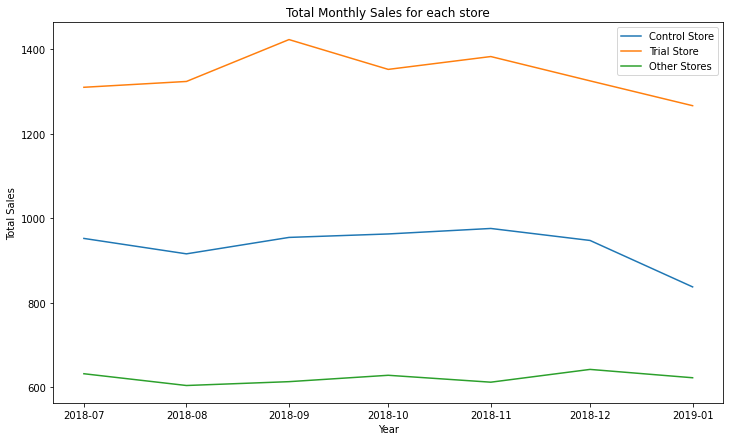

In [ ]:
#Plotting combined monthly sales for each store
plt.figure(figsize=(12,7))
plt.plot(combined_stores_sales)
plt.title('Total Monthly Sales for each store')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(['Control Store','Trial Store','Other Stores'])

#  **Visualisation for Control_Store,Trial_Store & Other_Stores using mnthly_nbr_of_customers** 

In [ ]:
#Create dataframes
#Control Store
control_store_customers = past_sales.loc[past_sales['store_type'] == 'Control Store', ['Transaction_Month', 'mnthly_nbr_of_customers']]
control_store_customers.set_index('Transaction_Month', inplace = True)
control_store_customers.rename(columns = {'mnthly_nbr_of_customers ': 'Control_Store_Customers'}, inplace = True)

#Trial Store
trial_store_customers = past_sales.loc[past_sales['store_type'] == 'Trial Store', ['Transaction_Month', 'mnthly_nbr_of_customers']]
trial_store_customers.set_index('Transaction_Month', inplace = True)
trial_store_customers.rename(columns = {'mnthly_nbr_of_customers ': 'Trial_Store_Customers'}, inplace = True)

#Other Stores
other_store_customers = past_sales.loc[past_sales['store_type'] == 'Other Stores', ['Transaction_Month', 'mnthly_nbr_of_customers']]
other_store_customers = pd.DataFrame(other_store_customers.groupby('Transaction_Month').mnthly_nbr_of_customers.mean())
other_store_customers.rename(columns = {'mnthly_nbr_of_customers': 'Other_Stores_Customers'}, inplace = True)



In [ ]:
#Combining the dataframes
combined_stores_customers=pd.concat([control_store_customers,trial_store_customers,other_store_customers],axis=1)
combined_stores_customers

,mnthly_nbr_of_customers,mnthly_nbr_of_customers,Other_Stores_Customers
Transaction_Month,,,
2018-07-01,107,129,71.813953
2018-08-01,108,131,71.562016
2018-09-01,101,124,69.585271
2018-10-01,102,123,71.015504
2018-11-01,111,130,69.914729
2018-12-01,101,126,72.996124
2019-01-01,95,117,70.689922


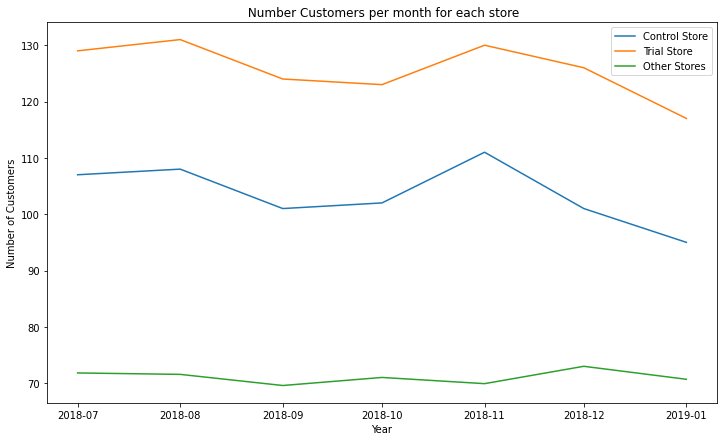

In [ ]:
#Plotting combined number of customers for each store
plt.figure(figsize=(12,7))
plt.plot(combined_stores_customers)
plt.title(' Number Customers per month for each store')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.legend(['Control Store','Trial Store','Other Stores'])

# **Pre-trial assessment for store 88**
The trial period goes from the start of February 2019 to end of April 2019. We now want to see if there has been an uplift in overall chip sales.

# **By Sales:**

In [ ]:
#Scale pre-trial control sales to match pre-trial trial store sales
#We compute this by dividing sum of 'tot_mnthly_sales' for trial store by sum of 'tot_mnthly_sales' for control store
tot_trial_sales = pre_trial_metrics.loc[pre_trial_metrics['store_type'] == 'Trial Store' , 'tot_mnthly_sales'].sum()
tot_control_sales = pre_trial_metrics.loc[pre_trial_metrics['store_type'] == 'Control Store', 'tot_mnthly_sales'].sum()
Scaling_Factor_Sales =tot_trial_sales / tot_control_sales
Scaling_Factor_Sales 



1.4338146535258616

In [ ]:
monthly_store_metrics.head()

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
Scaled_control_sales = monthly_store_metrics
Scaled_control_sales.head()

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
Scaled_control_sales=Scaled_control_sales.loc[Scaled_control_sales['STORE_NBR'] == 178]
Scaled_control_sales

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
2069,178,201807,952.0,107,1.224299,3.606061,2.015267,2018-07-01
2070,178,201808,915.5,108,1.231481,3.618577,1.902256,2018-08-01
2071,178,201809,954.4,101,1.267327,3.587970,2.078125,2018-09-01
2072,178,201810,962.6,102,1.382353,3.319310,2.056738,2018-10-01
2073,178,201811,975.6,111,1.243243,3.509353,2.014493,2018-11-01
2074,178,201812,947.2,101,1.326733,3.508148,2.014925,2018-12-01
2075,178,201901,837.2,95,1.242105,3.431148,2.067797,2019-01-01
2076,178,201902,1088.8,107,1.355140,3.703401,2.027586,2019-02-01
2077,178,201903,998.8,114,1.254386,3.492308,2.000000,2019-03-01
2078,178,201904,1059.8,117,1.264957,3.532667,2.027027,2019-04-01


In [ ]:
# Create a column which applies 'Scaling_Factor_Sales' to 'tot_mnthly_sales' column
Scaled_control_sales['Control_Sales']=Scaled_control_sales['tot_mnthly_sales']* Scaling_Factor_Sales
Scaled_control_sales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Sales
2069,178,201807,952.0,107,1.224299,3.606061,2.015267,2018-07-01,1364.991550
2070,178,201808,915.5,108,1.231481,3.618577,1.902256,2018-08-01,1312.657315
2071,178,201809,954.4,101,1.267327,3.587970,2.078125,2018-09-01,1368.432705
2072,178,201810,962.6,102,1.382353,3.319310,2.056738,2018-10-01,1380.189985
2073,178,201811,975.6,111,1.243243,3.509353,2.014493,2018-11-01,1398.829576
2074,178,201812,947.2,101,1.326733,3.508148,2.014925,2018-12-01,1358.109240
2075,178,201901,837.2,95,1.242105,3.431148,2.067797,2019-01-01,1200.389628
2076,178,201902,1088.8,107,1.355140,3.703401,2.027586,2019-02-01,1561.137395
2077,178,201903,998.8,114,1.254386,3.492308,2.000000,2019-03-01,1432.094076
2078,178,201904,1059.8,117,1.264957,3.532667,2.027027,2019-04-01,1519.556770


In [ ]:
# Create 'percentage_diff' dataframe
percentage_diff = Scaled_control_sales[['MONTHLY', 'Control_Sales']]
percentage_diff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'tot_mnthly_sales'
trial_sales = monthly_store_metrics.loc[monthly_store_metrics['STORE_NBR'] == trial_store, 'tot_mnthly_sales']
trial_sales.reset_index(drop = True, inplace = True)
percentage_diff = pd.concat([percentage_diff, trial_sales], axis = 1)
percentage_diff.rename(columns = {'tot_mnthly_sales': 'trial_sales'}, inplace = True)

percentage_diff

,MONTHLY,Control_Sales,trial_sales
0,201807,1364.991550,1310.00
1,201808,1312.657315,1323.80
2,201809,1368.432705,1423.00
3,201810,1380.189985,1352.40
4,201811,1398.829576,1382.80
5,201812,1358.109240,1325.20
6,201901,1200.389628,1266.40
7,201902,1561.137395,1370.20
8,201903,1432.094076,1477.20
9,201904,1519.556770,1439.40


In [ ]:
# Calculate percentage difference and put it in a new column

percentage_diff['percentage_diff'] = abs(percentage_diff.Control_Sales - percentage_diff.trial_sales) / percentage_diff.Control_Sales
percentage_diff

,MONTHLY,Control_Sales,trial_sales,percentage_diff
0,201807,1364.991550,1310.00,0.040287
1,201808,1312.657315,1323.80,0.008489
2,201809,1368.432705,1423.00,0.039876
3,201810,1380.189985,1352.40,0.020135
4,201811,1398.829576,1382.80,0.011459
5,201812,1358.109240,1325.20,0.024232
6,201901,1200.389628,1266.40,0.054991
7,201902,1561.137395,1370.20,0.122307
8,201903,1432.094076,1477.20,0.031496
9,201904,1519.556770,1439.40,0.052750


In [ ]:
#Null hypothesis:trial period== pre_trial period
#SD on %diff in pre trial period
from statistics import stdev
std_dev=stdev(percentage_diff.loc[percentage_diff['MONTHLY'] < 201902,'percentage_diff'])
std_dev

0.017074051922797786

In [ ]:
#Testing null hypothesis create a new column to compute the t-statistic
percentage_diff['t-calc']=(percentage_diff['percentage_diff'] - 0)/std_dev
percentage_diff.loc[(percentage_diff['MONTHLY'] > 201901) & (percentage_diff['MONTHLY'] < 201905) , 't-calc']

7    7.163302
8    1.844699
9    3.089489
Name: t-calc, dtype: float64

In [ ]:
#Degrees of freedom =n-1
#In our case n is the number of months for the pre-trial period which is 8
#So df=7
#Find 95% conf interval with 7 df
from scipy.stats import t 
df=7
t.isf(0.05,df)


1.8945786050613054

In [ ]:
#Add a new column to our scaled control sales for the transaction month
Scaled_control_sales['txn_month']=pd.to_datetime(Scaled_control_sales['MONTHLY'].astype(str),format='%Y%m')
Scaled_control_sales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Sales
2069,178,201807,952.0,107,1.224299,3.606061,2.015267,2018-07-01,1364.991550
2070,178,201808,915.5,108,1.231481,3.618577,1.902256,2018-08-01,1312.657315
2071,178,201809,954.4,101,1.267327,3.587970,2.078125,2018-09-01,1368.432705
2072,178,201810,962.6,102,1.382353,3.319310,2.056738,2018-10-01,1380.189985
2073,178,201811,975.6,111,1.243243,3.509353,2.014493,2018-11-01,1398.829576
2074,178,201812,947.2,101,1.326733,3.508148,2.014925,2018-12-01,1358.109240
2075,178,201901,837.2,95,1.242105,3.431148,2.067797,2019-01-01,1200.389628
2076,178,201902,1088.8,107,1.355140,3.703401,2.027586,2019-02-01,1561.137395
2077,178,201903,998.8,114,1.254386,3.492308,2.000000,2019-03-01,1432.094076
2078,178,201904,1059.8,117,1.264957,3.532667,2.027027,2019-04-01,1519.556770


In [ ]:
control_store_sales=Scaled_control_sales.loc[:,['txn_month','Control_Sales']]
control_store_sales.set_index('txn_month',inplace=True)
control_store_sales

,Control_Sales
txn_month,
2018-07-01,1364.991550
2018-08-01,1312.657315
2018-09-01,1368.432705
2018-10-01,1380.189985
2018-11-01,1398.829576
2018-12-01,1358.109240
2019-01-01,1200.389628
2019-02-01,1561.137395
2019-03-01,1432.094076


In [ ]:
monthly_store_metrics['txn_month'] = pd.to_datetime(monthly_store_metrics['MONTHLY'].astype(str), format = '%Y%m')
monthly_store_metrics.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
trial_store_sales = monthly_store_metrics.loc[monthly_store_metrics['STORE_NBR'] == trial_store, ['txn_month', 'tot_mnthly_sales']]
trial_store_sales.set_index('txn_month', inplace = True)
trial_store_sales.rename(columns = {'tot_mnthly_sales': 'Trial_Sales'}, inplace = True)
trial_store_sales

,Trial_Sales
txn_month,
2018-07-01,1310.00
2018-08-01,1323.80
2018-09-01,1423.00
2018-10-01,1352.40
2018-11-01,1382.80
2018-12-01,1325.20
2019-01-01,1266.40
2019-02-01,1370.20
2019-03-01,1477.20


In [ ]:
control_store_sales['control 5% conf interval']=control_store_sales['Control_Sales']*(1-std_dev*2)
control_store_sales['control 95% conf interval']=control_store_sales['Control_Sales']*(1+std_dev*2)
control_store_sales

,Control_Sales,control 5% conf interval,control 95% conf interval
txn_month,,,
2018-07-01,1364.991550,1318.379677,1411.603423
2018-08-01,1312.657315,1267.832557,1357.482074
2018-09-01,1368.432705,1321.703323,1415.162087
2018-10-01,1380.189985,1333.059115,1427.320856
2018-11-01,1398.829576,1351.062198,1446.596954
2018-12-01,1358.109240,1311.732384,1404.486095
2019-01-01,1200.389628,1159.398598,1241.380658
2019-02-01,1561.137395,1507.827513,1614.447277
2019-03-01,1432.094076,1383.190779,1480.997373


In [ ]:
combined_sales=pd.merge(control_store_sales,trial_store_sales,left_index=True,right_index=True)
combined_sales

,Control_Sales,control 5% conf interval,control 95% conf interval,Trial_Sales
txn_month,,,,
2018-07-01,1364.991550,1318.379677,1411.603423,1310.00
2018-08-01,1312.657315,1267.832557,1357.482074,1323.80
2018-09-01,1368.432705,1321.703323,1415.162087,1423.00
2018-10-01,1380.189985,1333.059115,1427.320856,1352.40
2018-11-01,1398.829576,1351.062198,1446.596954,1382.80
2018-12-01,1358.109240,1311.732384,1404.486095,1325.20
2019-01-01,1200.389628,1159.398598,1241.380658,1266.40
2019-02-01,1561.137395,1507.827513,1614.447277,1370.20
2019-03-01,1432.094076,1383.190779,1480.997373,1477.20


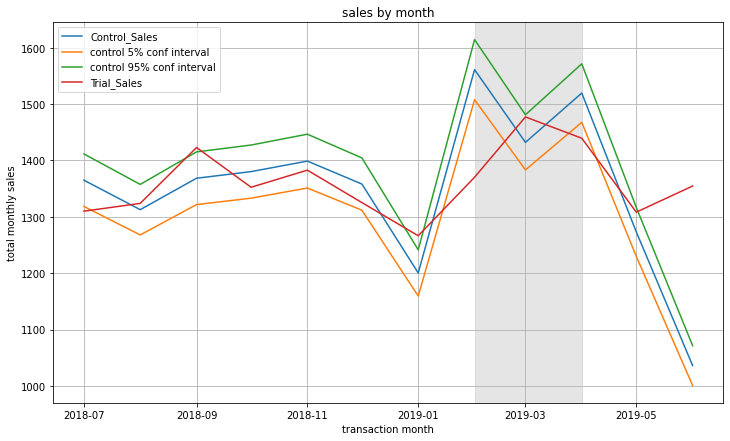

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize = (12, 7))
plt.plot(combined_sales)
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)
plt.legend(['Control_Sales',	'control 5% conf interval',	'control 95% conf interval',	'Trial_Sales'])
plt.xlabel('transaction month')
plt.ylabel('total monthly sales')
plt.title('sales by month')
plt.grid()

# **By Customers:**

In [ ]:
#Scale pre-trial control customers to match pre-trial trial store customers
#We compute this by dividing sum of 'mnthly_nbr_of_customers' for trial store by sum of 'mnthly_nbr_of_customers' for control store
tot_trial_customers = pre_trial_metrics.loc[pre_trial_metrics['store_type'] == 'Trial Store' , 'mnthly_nbr_of_customers'].sum()
tot_control_customers = pre_trial_metrics.loc[pre_trial_metrics['store_type'] == 'Control Store', 'mnthly_nbr_of_customers'].sum()
Scaling_Factor_Customers =tot_trial_customers / tot_control_customers
Scaling_Factor_Customers


1.2137931034482758

In [ ]:
Scaled_control_customers = monthly_store_metrics
Scaled_control_customers.head()

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
Scaled_control_customers=Scaled_control_customers.loc[Scaled_control_customers['STORE_NBR'] == 178]
Scaled_control_customers

,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
2069,178,201807,952.0,107,1.224299,3.606061,2.015267,2018-07-01
2070,178,201808,915.5,108,1.231481,3.618577,1.902256,2018-08-01
2071,178,201809,954.4,101,1.267327,3.587970,2.078125,2018-09-01
2072,178,201810,962.6,102,1.382353,3.319310,2.056738,2018-10-01
2073,178,201811,975.6,111,1.243243,3.509353,2.014493,2018-11-01
2074,178,201812,947.2,101,1.326733,3.508148,2.014925,2018-12-01
2075,178,201901,837.2,95,1.242105,3.431148,2.067797,2019-01-01
2076,178,201902,1088.8,107,1.355140,3.703401,2.027586,2019-02-01
2077,178,201903,998.8,114,1.254386,3.492308,2.000000,2019-03-01
2078,178,201904,1059.8,117,1.264957,3.532667,2.027027,2019-04-01


In [ ]:
# Create a column which applies 'Scaling_Factor_Sales' to 'tot_mnthly_sales' column
Scaled_control_customers['Control_Customers']=Scaled_control_customers['mnthly_nbr_of_customers']* Scaling_Factor_Customers
Scaled_control_customers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Customers
2069,178,201807,952.0,107,1.224299,3.606061,2.015267,2018-07-01,129.875862
2070,178,201808,915.5,108,1.231481,3.618577,1.902256,2018-08-01,131.089655
2071,178,201809,954.4,101,1.267327,3.587970,2.078125,2018-09-01,122.593103
2072,178,201810,962.6,102,1.382353,3.319310,2.056738,2018-10-01,123.806897
2073,178,201811,975.6,111,1.243243,3.509353,2.014493,2018-11-01,134.731034
2074,178,201812,947.2,101,1.326733,3.508148,2.014925,2018-12-01,122.593103
2075,178,201901,837.2,95,1.242105,3.431148,2.067797,2019-01-01,115.310345
2076,178,201902,1088.8,107,1.355140,3.703401,2.027586,2019-02-01,129.875862
2077,178,201903,998.8,114,1.254386,3.492308,2.000000,2019-03-01,138.372414
2078,178,201904,1059.8,117,1.264957,3.532667,2.027027,2019-04-01,142.013793


In [ ]:

Scaled_control_customers['Control_Customers'] = Scaled_control_customers['mnthly_nbr_of_customers'] * Scaling_Factor_Customers
Scaled_control_customers.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Customers
2069,178,201807,952.0,107,1.224299,3.606061,2.015267,2018-07-01,129.875862
2070,178,201808,915.5,108,1.231481,3.618577,1.902256,2018-08-01,131.089655
2071,178,201809,954.4,101,1.267327,3.587970,2.078125,2018-09-01,122.593103
2072,178,201810,962.6,102,1.382353,3.319310,2.056738,2018-10-01,123.806897
2073,178,201811,975.6,111,1.243243,3.509353,2.014493,2018-11-01,134.731034


In [ ]:
# Create 'percentage_diff' dataframe
percentage_diff = Scaled_control_customers[['MONTHLY', 'Control_Customers']]
percentage_diff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'mnthly_nbr_customers'
trial_customers = monthly_store_metrics.loc[monthly_store_metrics['STORE_NBR'] == trial_store, 'mnthly_nbr_of_customers']
trial_customers.reset_index(drop = True, inplace = True)
percentage_diff = pd.concat([percentage_diff, trial_customers], axis = 1)
percentage_diff.rename(columns = {'mnthly_nbr_of_customers': 'trial_customers'}, inplace = True)

percentage_diff

,MONTHLY,Control_Customers,trial_customers
0,201807,129.875862,129
1,201808,131.089655,131
2,201809,122.593103,124
3,201810,123.806897,123
4,201811,134.731034,130
5,201812,122.593103,126
6,201901,115.310345,117
7,201902,129.875862,124
8,201903,138.372414,134
9,201904,142.013793,128


In [ ]:
# Calculate percentage difference and put it in a new column

percentage_diff['percentage_diff'] = abs(percentage_diff.Control_Customers - percentage_diff.trial_customers) / percentage_diff.Control_Customers
percentage_diff

,MONTHLY,Control_Customers,trial_customers,percentage_diff
0,201807,129.875862,129,0.006744
1,201808,131.089655,131,0.000684
2,201809,122.593103,124,0.011476
3,201810,123.806897,123,0.006517
4,201811,134.731034,130,0.035115
5,201812,122.593103,126,0.027790
6,201901,115.310345,117,0.014653
7,201902,129.875862,124,0.045242
8,201903,138.372414,134,0.031599
9,201904,142.013793,128,0.098679


In [ ]:
#Null hypothesis:trial period== pre_trial period
#SD on %diff in pre trial period
from statistics import stdev
std_dev=stdev(percentage_diff.loc[percentage_diff['MONTHLY'] < 201902,'percentage_diff'])
std_dev

0.012417826272588403

In [ ]:
#Testing null hypothesis create a new column to compute the t-statistic
percentage_diff['t-calc']=(percentage_diff['percentage_diff'] - 0)/std_dev
percentage_diff.loc[(percentage_diff['MONTHLY'] > 201901) & (percentage_diff['MONTHLY'] < 201905) , 't-calc']

7    3.643322
8    2.544639
9    7.946568
Name: t-calc, dtype: float64

In [ ]:
#Degrees of freedom =n-1
#In our case n is the number of months for the pre-trial period which is 8
#So df=7
#Find 95% conf interval with 7 df
from scipy.stats import t 
df=7
t.isf(0.05,df)


1.8945786050613054

In [ ]:
#Add a new column to our scaled control sales for the transaction month
Scaled_control_customers['txn_month']=pd.to_datetime(Scaled_control_customers['MONTHLY'].astype(str),format='%Y%m')
Scaled_control_customers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month,Control_Customers
2069,178,201807,952.0,107,1.224299,3.606061,2.015267,2018-07-01,129.875862
2070,178,201808,915.5,108,1.231481,3.618577,1.902256,2018-08-01,131.089655
2071,178,201809,954.4,101,1.267327,3.587970,2.078125,2018-09-01,122.593103
2072,178,201810,962.6,102,1.382353,3.319310,2.056738,2018-10-01,123.806897
2073,178,201811,975.6,111,1.243243,3.509353,2.014493,2018-11-01,134.731034
2074,178,201812,947.2,101,1.326733,3.508148,2.014925,2018-12-01,122.593103
2075,178,201901,837.2,95,1.242105,3.431148,2.067797,2019-01-01,115.310345
2076,178,201902,1088.8,107,1.355140,3.703401,2.027586,2019-02-01,129.875862
2077,178,201903,998.8,114,1.254386,3.492308,2.000000,2019-03-01,138.372414
2078,178,201904,1059.8,117,1.264957,3.532667,2.027027,2019-04-01,142.013793


In [ ]:
control_store_customers=Scaled_control_customers.loc[:,['txn_month','Control_Customers']]
control_store_customers.set_index('txn_month',inplace=True)
control_store_customers

,Control_Customers
txn_month,
2018-07-01,129.875862
2018-08-01,131.089655
2018-09-01,122.593103
2018-10-01,123.806897
2018-11-01,134.731034
2018-12-01,122.593103
2019-01-01,115.310345
2019-02-01,129.875862
2019-03-01,138.372414


In [ ]:
monthly_store_metrics['txn_month'] = pd.to_datetime(monthly_store_metrics['MONTHLY'].astype(str), format = '%Y%m')
monthly_store_metrics.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STORE_NBR,MONTHLY,tot_mnthly_sales,mnthly_nbr_of_customers,mnthly_transaction_pr_cstmr,avg_mnthly_price,chips_per_transaction,txn_month
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [ ]:
trial_store_customers = monthly_store_metrics.loc[monthly_store_metrics['STORE_NBR'] == trial_store, ['txn_month', 'mnthly_nbr_of_customers']]
trial_store_customers.set_index('txn_month', inplace = True)
trial_store_customers.rename(columns = {'mnthly_nbr_of_customers': 'Trial_Customers'}, inplace = True)
trial_store_customers

,Trial_Customers
txn_month,
2018-07-01,129
2018-08-01,131
2018-09-01,124
2018-10-01,123
2018-11-01,130
2018-12-01,126
2019-01-01,117
2019-02-01,124
2019-03-01,134


In [ ]:
control_store_customers['control 5% conf interval']=control_store_customers['Control_Customers']*(1-std_dev*2)
control_store_customers['control 95% conf interval']=control_store_customers['Control_Customers']*(1+std_dev*2)
control_store_customers

,Control_Customers,control 5% conf interval,control 95% conf interval
txn_month,,,
2018-07-01,129.875862,126.650310,133.101414
2018-08-01,131.089655,127.833958,134.345352
2018-09-01,122.593103,119.548424,125.637783
2018-10-01,123.806897,120.732071,126.881722
2018-11-01,134.731034,131.384901,138.077168
2018-12-01,122.593103,119.548424,125.637783
2019-01-01,115.310345,112.446537,118.174152
2019-02-01,129.875862,126.650310,133.101414
2019-03-01,138.372414,134.935845,141.808983


In [ ]:
combined_customers=pd.merge(control_store_customers,trial_store_customers,left_index=True,right_index=True)
combined_customers

,Control_Customers,control 5% conf interval,control 95% conf interval,Trial_Customers
txn_month,,,,
2018-07-01,129.875862,126.650310,133.101414,129
2018-08-01,131.089655,127.833958,134.345352,131
2018-09-01,122.593103,119.548424,125.637783,124
2018-10-01,123.806897,120.732071,126.881722,123
2018-11-01,134.731034,131.384901,138.077168,130
2018-12-01,122.593103,119.548424,125.637783,126
2019-01-01,115.310345,112.446537,118.174152,117
2019-02-01,129.875862,126.650310,133.101414,124
2019-03-01,138.372414,134.935845,141.808983,134


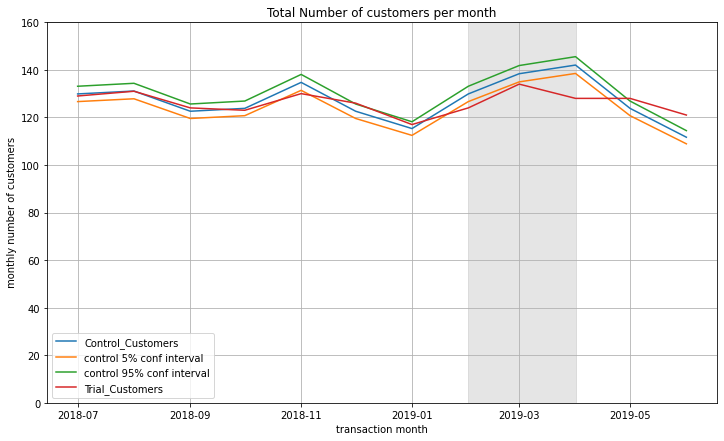

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize = (12, 7))

plt.plot(combined_customers)

plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)
plt.legend(['Control_Customers',	'control 5% conf interval',	'control 95% conf interval',	'Trial_Customers'])
plt.xlabel('transaction month')
plt.ylabel(' monthly number of customers')
plt.ylim((0, 160))
plt.title('Total Number of customers per month')
plt.grid()

# **Conclusion**

It looks like the number of customers is significantly higher in all of the three months of the trial period.